# Init results

In [1]:
#%%capture
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import os
import cortex
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm
import sys
import yaml
import time
from collections import defaultdict as dd
from scipy.stats import sem, ks_2samp
import seaborn as sns
import pandas as pds
import dill

opj = os.path.join

from prfpy.stimulus import PRFStimulus2D
from prfpy.model import Iso2DGaussianModel, CSS_Iso2DGaussianModel, Norm_Iso2DGaussianModel, DoG_Iso2DGaussianModel
from prfpy.fit import Iso2DGaussianFitter, Norm_Iso2DGaussianFitter, DoG_Iso2DGaussianFitter, CSS_Iso2DGaussianFitter

from prfpytools.preproc_utils import *
from prfpytools.postproc_utils import *
from prfpytools.visualize_results import visualize_results

from IPython.core.display import display, HTML

sound_file = '/Users/marcoaqil/Downloads/filling-your-inbox.mp3'

/Users/marcoaqil/anaconda3/envs/prfpy_2021/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_17910/912037629.py:30: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#results object
current_results = results()
                        

## Combine & Process results

In [10]:
current_results.combine_results(results_folder='/Volumes/Crucial_X8/SM-pRF/derivatives/prfpy', 
                    timecourse_folder='/Volumes/Crucial_X8/SM-pRF/derivatives/timecourses',
                                cvfold_comb='mean',
                               calculate_CCrsq=False,
                               calculate_noise_ceiling=True,
                               screenshot_paths=['/Volumes/Crucial_X8/SM-pRF/derivatives/2R_Screenshots'])

  0%|                                                                                                                                               | 0/48 [00:00<?, ?it/s]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-16-15-04', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [8, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11989263, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True, 

/Users/marcoaqil/anaconda3/envs/prfpy_2021/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
  2%|██▊                                                                                                                                  | 1/48 [01:20<1:03:18, 80.81s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-16-15-07', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11989297, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

  4%|█████▋                                                                                                                                 | 2/48 [02:10<48:05, 62.72s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-16-15-10', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11989331, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

  6%|████████▍                                                                                                                              | 3/48 [03:01<42:54, 57.20s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-14-12-31', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'raw', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12031372, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

  8%|███████████▎                                                                                                                           | 4/48 [03:01<25:27, 34.71s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-18-00-18', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [6, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11993976, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True, 

 10%|██████████████                                                                                                                         | 5/48 [03:53<29:17, 40.88s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-18-00-21', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [9, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11993997, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True, 

 12%|████████████████▉                                                                                                                      | 6/48 [04:45<31:16, 44.68s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-18-00-25', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11994018, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 15%|███████████████████▋                                                                                                                   | 7/48 [05:38<32:23, 47.39s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-21-24-09', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11996261, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 17%|██████████████████████▌                                                                                                                | 8/48 [05:38<21:35, 32.39s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-21-47-04', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [7, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11996524, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True, 

 19%|█████████████████████████▎                                                                                                             | 9/48 [06:16<22:08, 34.06s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-21-47-10', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11996545, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 21%|███████████████████████████▉                                                                                                          | 10/48 [06:53<22:13, 35.09s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-21-47-18', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11996566, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 25%|█████████████████████████████████▌                                                                                                    | 12/48 [07:32<15:06, 25.19s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-21-46-54', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11996503, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 27%|████████████████████████████████████▎                                                                                                 | 13/48 [08:17<18:13, 31.25s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-22-29-52', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997104, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 29%|███████████████████████████████████████                                                                                               | 14/48 [09:18<22:43, 40.10s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-22-29-55', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [16, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997105, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 31%|█████████████████████████████████████████▉                                                                                            | 15/48 [10:25<26:35, 48.35s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-22-29-43', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [16, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997102, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 33%|████████████████████████████████████████████▋                                                                                         | 16/48 [10:26<18:04, 33.90s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-23-11-45', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997562, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 35%|███████████████████████████████████████████████▍                                                                                      | 17/48 [11:06<18:31, 35.86s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-23-11-48', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997565, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 38%|██████████████████████████████████████████████████▎                                                                                   | 18/48 [11:49<18:59, 37.97s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-23-11-53', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [16, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997567, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 40%|█████████████████████████████████████████████████████                                                                                 | 19/48 [12:38<20:00, 41.40s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-23-11-25', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [20, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997553, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 42%|███████████████████████████████████████████████████████▊                                                                              | 20/48 [12:39<13:33, 29.04s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-12-16-53', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [9, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12030489, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True, 

 44%|██████████████████████████████████████████████████████████▋                                                                           | 21/48 [13:14<13:53, 30.85s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-12-16-56', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [10, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12030510, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 46%|█████████████████████████████████████████████████████████████▍                                                                        | 22/48 [13:49<13:59, 32.27s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-12-16-58', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12030531, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 50%|███████████████████████████████████████████████████████████████████                                                                   | 24/48 [14:25<09:22, 23.43s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-12-17-07', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12030552, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 52%|█████████████████████████████████████████████████████████████████████▊                                                                | 25/48 [15:16<12:06, 31.61s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-00-05-36', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12004339, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 54%|████████████████████████████████████████████████████████████████████████▌                                                             | 26/48 [16:01<13:02, 35.59s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-00-05-38', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12004371, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 56%|███████████████████████████████████████████████████████████████████████████▍                                                          | 27/48 [16:45<13:19, 38.08s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-00-05-24', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12004225, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 58%|██████████████████████████████████████████████████████████████████████████████▏                                                       | 28/48 [16:45<08:54, 26.73s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-14-43-18', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3361904, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 5, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 60%|████████████████████████████████████████████████████████████████████████████████▉                                                     | 29/48 [17:32<10:19, 32.62s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-02-07', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362856, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 62%|███████████████████████████████████████████████████████████████████████████████████▊                                                  | 30/48 [18:17<10:59, 36.62s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-02-17', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362860, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 65%|██████████████████████████████████████████████████████████████████████████████████████▌                                               | 31/48 [19:04<11:13, 39.62s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-50-06', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3363378, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 67%|█████████████████████████████████████████████████████████████████████████████████████████▎                                            | 32/48 [19:04<07:24, 27.80s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-03-35', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362862, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 69%|████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 33/48 [19:53<08:32, 34.15s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-03-40', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362863, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 71%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 34/48 [20:46<09:16, 39.78s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-03-47', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362872, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 35/48 [21:37<09:20, 43.09s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-55-24', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3363420, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 36/48 [21:37<06:02, 30.24s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-03-59', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362873, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 37/48 [22:21<06:15, 34.14s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-04-08', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362874, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 38/48 [23:04<06:09, 36.99s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-04-13', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362875, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 40/48 [23:50<03:42, 27.77s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-55-28', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3363422, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 41/48 [24:35<03:51, 33.03s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-12-54', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362990, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 42/48 [25:16<03:32, 35.44s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-12-57', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362991, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 43/48 [26:00<03:10, 38.04s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-55-31', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3363423, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 44/48 [26:01<01:46, 26.69s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-13-18', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362992, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 45/48 [26:52<01:42, 34.11s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-13-20', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [10, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362993, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 46/48 [27:46<01:19, 39.92s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-13-22', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3362995, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 47/48 [28:37<00:43, 43.43s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-08-16-16-55-36', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/projects/0/vuse0612/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '1:05', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': False, 'grid_fit_hrf_norm': False, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': False, 'job_id': 3363442, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 191, 'n_chunks': 4, 'n_jobs': 191, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_onl

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [28:37<00:00, 35.79s/it]


In [11]:
#mergedict_OR(current_results.main_dict,vis_res.main_dict)

In [12]:
current_results.process_results(current_results.main_dict,
                                compute_suppression_index = False,
                                return_norm_profiles = False,
                               compute_fwhmax_fwatmin = False)

  0%|                                                                                                                                                | 0/2 [00:00<?, ?it/s]

fsnative



  0%|                                                                                                                                                | 0/1 [00:00<?, ?it/s]

fit-task-2R_fit-runs-all




  0%|                                                                                                                                               | 0/48 [00:00<?, ?it/s]/Users/marcoaqil/prfpytools/prfpytools/postproc_utils.py:463: RuntimeWarning: invalid value encountered in divide
  processed_results['Size ratio (sigma_2/sigma_1)'][k2][mask] = v2[:,6]/v2[:,2]
/Users/marcoaqil/prfpytools/prfpytools/postproc_utils.py:466: RuntimeWarning: invalid value encountered in divide
  processed_results['Ratio (B/D)'][k2][mask] = v2[:,7]/v2[:,8]


 60%|████████████████████████████████████████████████████████████████████████████████▉                                                     | 29/48 [00:00<00:00, 89.69it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 38/48 [00:03<00:01,  9.98it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████

In [ ]:
vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all']['sub-003_ses-1']['Timecourse Stats'].keys()

# Init visualize results

In [3]:
vis_res = visualize_results(current_results)

In [ ]:
for ss, ee in vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-CVmean'].items():
    vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all'][ss]['Processed Results']['RSq'] = ee['Processed Results']['RSq']

In [ ]:
current_results.main_dict['fsnative'].keys()

## Fix HCP MSMall ordering (run once on HCP data)

In [ ]:
#fix HCP ordering
if 'HCP' in vis_res.main_dict:
    hcp_atlas_mask_path = ['/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/L.atlasroi.59k_fs_LR.shape.gii',
                          '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/R.atlasroi.59k_fs_LR.shape.gii']
    vis_res.fix_hcp_ordering(vis_res.main_dict['HCP'], hcp_atlas_mask_path)

## Load previous visualize_result.main_dict

In [4]:
#extremely useful in cases of having to unpickle objects when class/module/function names have been changed
class RenameUnpickler(dill.Unpickler):
    def find_class(self, module, name):
        renamed_module = module
        if "utils." in module:
            renamed_module = module.replace("utils.","prfpytools.")

        return super(RenameUnpickler, self).find_class(renamed_module, name)

def renamed_load(file_obj):
    return RenameUnpickler(file_obj).load()

In [5]:
#rsqwm have rsq-weighted means over subjects on fsaverage
#maindict_newhrf#maindict_nordic#maindict_nordic_pybest#maindict_nordic_pybest_nohrf#maindict_nordic_pybest_cv#maindict_nordic_pybest_cvrsqcomb
#maindict_nordic_pybest_nonegprfs #maindict_nordic_pybest_nonegprfs_notc #maindict_nordic_pybest_nonegprfs_monstergrid
###########
#maindict_base #maindict_fullpipe
with open('/Volumes/Crucial_X8/maindict_smprf_newsjs.pickle', 'rb') as handle:
    vis_res.main_dict=renamed_load(handle)

## Save current visualize_result.main_dict

In [30]:
with open('/Volumes/Crucial_X8/maindict_smprf_newsjs.pickle', 'wb') as handle:
     dill.dump(vis_res.main_dict, handle)

In [ ]:
vis_res.main_dict['fsaverage']['fit-task-2R_fit-runs-all']['fsaverage']['Processed Results']['x_pos']['Norm_abcd']

## Load/Save rois (run always)

In [6]:
#this function parses or imports labaled ROIs for all subjects (run always)
#set to list of ROI names to output indices of rois for roi-only fitting. empty list for no output
output_rois = []#['custom.OccPole', 'custom.V1','custom.V2','custom.V3','custom.hV4','custom.VO',
                      #'custom.V3AB','custom.LO','custom.TO','custom.IPS','custom.FO']
    
#import flatmaps from freesurfer, if created, and import freesurfer custom rois to pycortex overlays.svg (need pre-imported flatmaps for this)
import_flatmaps = False

output_rois_path = '/Volumes/Crucial_X8/SM-pRF/derivatives' #/Volumes/Crucial_X8/PRFMapping/PRFMapping-Deriv-hires
#freesurfer directory
fs_dir = '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer'

#HCP atlas path (without .{hemi}.gii)
hcp_atlas_path = '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/Q1-Q6_RelatedParcellation210.CorticalAreas_dil_Colors.59k_fs_LR.dlabel' 

vis_res.define_rois_and_flatmaps(fs_dir, output_rois_path, import_flatmaps, output_rois, hcp_atlas_path)

vis_res.compute_roi_borders(subject_ids = ['sub-001_ses-1'], rois_prefix='custom', previous_borders_path='/Users/marcoaqil/custom_borders_sub001.npy')
#, only_rois = ['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS'],  previous_borders_path='/Users/marcoaqil/wang_borders_sub001.npy')
    

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V1v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V1v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V1d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V3v.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.PHC1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.PHC1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.PHC2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.PHC2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.TO2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.TO2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.TO1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.TO1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.LO2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.LO2

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.V3v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.V3d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.V3d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.hV4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.hV4.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.LO2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.LO2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.LO1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.LO1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.V3B.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.V3B.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.V3A.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.V3A.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.IPS0.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.IPS0.l

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.custom.hV4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.custom.hV4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.custom.IPS.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.custom.IPS.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.wang2015atlas.V3v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.wang2015atlas.V3d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.wang2015atlas.V3d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.wang2015atlas.hV4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.wang2015atlas.hV4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.wang2015atlas.VO1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.wang2015atlas.VO1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.wang2015atlas.VO2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.wang2015atlas.VO2.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.V1v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.V1v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/fr

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.V3v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.V3d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.V3d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.hV4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.hV4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.VO1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.VO1.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.custom.hV4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.custom.hV4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.custom.IPS.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.custom.IPS.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.custom.hV4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.custom.hV4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.custom.IPS.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.custom.IPS.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V1v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V1v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V1d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V3v.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.hV4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.hV4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.IPS.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.IPS.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.wang2015atlas.V1v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.wang2015atlas.V1v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.wang2015atlas.V1d.label']
looking for ['/Volumes/Crucial_X8/SM-pR

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.wang2015atlas.V1v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.wang2015atlas.V1v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.wang2015atlas.V1d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.wang2015atlas.V2d.label']
looking for

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.wang2015atlas.PHC2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.wang2015atlas.PHC2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.wang2015atlas.TO2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.wang2015atlas.TO2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.wang2015atlas.TO1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.wang2015atlas.TO1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.wang2015atlas.LO2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.wang2015atlas.LO2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.wang2015atlas.LO1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.wang2015atlas.LO1.l

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.custom.V3AB.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.custom.V3AB.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.custom.hV4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.custom.hV4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.custom.IPS.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.custom.IPS.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/lh.wang2015atlas.IPS0.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/rh.wang2015atlas.IPS0.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/lh.wang2015atlas.IPS1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/rh.wang2015atlas.IPS1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/lh.wang2015atlas.IPS2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/rh.wang2015atlas.IPS2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/lh.wang2015atlas.IPS3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/rh.wang2015atlas.IPS3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/lh.wang2015atlas.IPS4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/rh.wang2015atla

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/lh.wang2015atlas.IPS1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/rh.wang2015atlas.IPS1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/lh.wang2015atlas.IPS2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/rh.wang2015atlas.IPS2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/lh.wang2015atlas.IPS3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/rh.wang2015atlas.IPS3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/lh.wang2015atlas.IPS4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/rh.wang2015atlas.IPS4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/lh.wang2015atlas.IPS5.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/label/rh.wang2015atla

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/label/lh.wang2015atlas.IPS1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/label/rh.wang2015atlas.IPS1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/label/lh.wang2015atlas.IPS2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/label/rh.wang2015atlas.IPS2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/label/lh.wang2015atlas.IPS3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/label/rh.wang2015atlas.IPS3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/label/lh.wang2015atlas.IPS4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/label/rh.wang2015atlas.IPS4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/label/lh.wang2015atlas.IPS5.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/label/rh.wang2015atla

In [ ]:
np.save('/Users/marcoaqil/custom_borders_sub001.npy',vis_res.idx_rois_borders['sub-001_ses-1']['custom'])

## Project to fsaverage

In [44]:
#projecting results to fsaverage surface
vis_res.project_to_fsaverage(models =['Norm_abcd'],#['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['hrf_1','x_pos', 'y_pos','Norm Param. B','Norm Param. D','Size (sigma_1)','Size (sigma_2)','Amplitude', 'Surround Amplitude'],# 'Noise Ceiling'],#[
                            #['x_pos', 'y_pos'],#['Noise Ceiling 10mg-placebo'],#['hrf_1','hrf_2','x_pos', 'y_pos','Norm Param. B','Norm Param. D','Size (sigma_1)','Size (sigma_2)','Amplitude', 'Surround Amplitude','Size (fwhmax)','Surround Size (fwatmin)'],# 'Noise Ceiling'],#[
                             weight = 'RSq', #groupname='10mg',
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.subjects if 'all' in s])#[s for s in vis_res.groups_dict['10mg']])

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-all RSq Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_RSq_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:54, 10.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:43, 10.34s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:23,  9.28s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:40<01:21, 10.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:05,  9.36s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:51,  8.64s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:43,  8.73s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:35,  8.80s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:22<00:26,  8.99s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:30<00:17,  8.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:39<00:08,  8.60s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


 10%|█████████████▍                                                                                                                        | 1/10 [01:48<16:18, 108.70s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Readin


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-all hrf_1 Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_hrf1_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:41,  9.27s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 17%|██████████████████████▌                                                                                                                | 2/12 [00:18<01:34,  9.43s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:26<01:16,  8.50s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:36<01:13,  9.18s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:44<01:00,  8.66s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:51<00:48,  8.13s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [00:59<00:41,  8.32s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:08<00:33,  8.49s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:18<00:26,  8.78s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:26<00:17,  8.58s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:34<00:08,  8.44s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [01:44<00:00,  8.67s/it]
/Users/marcoaqil/prfpytools/prfpytools/visualize_results.py:1834: RuntimeWarning: invalid value encountered in divide
  fsaverage_group_average = (data*weights).sum(0)/weights.sum(0)
 20%|██████████████████████████▊                                                                                                           | 2/10 [03:32<14:07, 105.98s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-all x_pos Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_xpos_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:41,  9.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 17%|██████████████████████▌                                                                                                                | 2/12 [00:18<01:34,  9.45s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:26<01:16,  8.51s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:36<01:13,  9.15s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:44<01:00,  8.64s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:51<00:48,  8.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [00:59<00:41,  8.32s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:08<00:33,  8.50s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:18<00:26,  8.78s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:26<00:17,  8.60s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:34<00:08,  8.45s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 30%|████████████████████████████████████████▏                                                                                             | 3/10 [05:16<12:15, 105.13s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-all y_pos Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_ypos_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:40,  9.17s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 17%|██████████████████████▌                                                                                                                | 2/12 [00:18<01:33,  9.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:26<01:16,  8.46s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:36<01:13,  9.13s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:43<01:00,  8.65s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:51<00:48,  8.15s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:00<00:42,  8.46s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:09<00:34,  8.72s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:19<00:27,  9.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:28<00:18,  9.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:37<00:08,  8.93s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


 40%|█████████████████████████████████████████████████████▌                                                                                | 4/10 [07:04<10:36, 106.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Re


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-all Norm Param. B Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_NormParamB_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    =


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.77s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:40, 10.01s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:17,  9.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:05,  9.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:52,  8.78s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.97s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.12s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:24<00:28,  9.47s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.27s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.08s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 50%|███████████████████████████████████████████████████████████████████                                                                   | 5/10 [08:56<09:00, 108.14s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-all Norm Param. D Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_NormParamD_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    =


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:49,  9.94s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:41, 10.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:21,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.81s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.18s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.56s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:43,  8.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:12<00:35,  8.96s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:27,  9.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.22s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 60%|████████████████████████████████████████████████████████████████████████████████▍                                                     | 6/10 [10:48<07:17, 109.49s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-all Size (sigma_1) Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_Sizesigma1_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:53, 10.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 17%|██████████████████████▌                                                                                                                | 2/12 [00:21<01:47, 10.71s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:29<01:27,  9.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:41<01:23, 10.45s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:49<01:08,  9.73s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:57<00:54,  9.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:06<00:45,  9.15s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:16<00:37,  9.39s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:27<00:29,  9.71s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:36<00:18,  9.48s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:45<00:09,  9.28s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 70%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 7/10 [12:43<05:34, 111.47s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-all Size (sigma_2) Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_Sizesigma2_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:49,  9.95s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:41, 10.14s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:23,  9.32s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:20, 10.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:07,  9.60s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:57<00:56,  9.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:09<00:50, 10.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:20<00:42, 10.63s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:32<00:32, 10.87s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:41<00:20, 10.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:50<00:09,  9.92s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 8/10 [14:44<03:48, 114.45s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-all Amplitude Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_Amplitude_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:49,  9.98s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:41, 10.16s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:23,  9.27s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:19, 10.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:05,  9.42s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:52,  8.82s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:45,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:14<00:36,  9.25s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:24<00:28,  9.53s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:33<00:18,  9.34s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:42<00:09,  9.17s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 9/10 [16:38<01:54, 114.18s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-all Surround Amplitude Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_SurroundAmplitude_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi   


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:48,  9.89s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.08s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:19,  9.98s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:06,  9.53s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:53,  8.97s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:46,  9.21s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:15<00:37,  9.46s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:26<00:29,  9.77s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:35<00:19,  9.56s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:44<00:09,  9.43s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [18:33<00:00, 111.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-all_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-all_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-tr


/Users/marcoaqil/prfpytools/prfpytools/visualize_results.py:1855: RuntimeWarning: invalid value encountered in divide
  subj_res['Processed Results']['Size ratio (sigma_2/sigma_1)'][model] = subj_res['Processed Results']['Size (sigma_2)'][model]/subj_res['Processed Results']['Size (sigma_1)'][model]
/Users/marcoaqil/prfpytools/prfpytools/visualize_results.py:1859: RuntimeWarning: invalid value encountered in divide
  subj_res['Processed Results']['Ratio (B/D)'][model] = subj_res['Processed Results']['Norm Param. B'][model]/subj_res['Processed Results']['Norm Param. D'][model]


In [45]:
#projecting results to fsaverage surface
vis_res.project_to_fsaverage(models =['Norm_abcd'],#['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['hrf_1','x_pos', 'y_pos','Norm Param. B','Norm Param. D','Size (sigma_1)','Size (sigma_2)','Amplitude', 'Surround Amplitude'],# 'Noise Ceiling'],#[
                            #['x_pos', 'y_pos'],#['Noise Ceiling 10mg-placebo'],#['hrf_1','hrf_2','x_pos', 'y_pos','Norm Param. B','Norm Param. D','Size (sigma_1)','Size (sigma_2)','Amplitude', 'Surround Amplitude','Size (fwhmax)','Surround Size (fwatmin)'],# 'Noise Ceiling'],#[
                             weight = 'RSq', groupname='10mg',
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.groups_dict['10mg']])

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 RSq Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RSq_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg 


  8%|███████████▎                                                                                                                           | 1/12 [00:11<02:02, 11.13s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 17%|██████████████████████▌                                                                                                                | 2/12 [00:22<01:52, 11.28s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:30<01:29, 10.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:42<01:23, 10.50s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:50<01:08,  9.80s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:58<00:54,  9.17s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:08<00:46,  9.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:17<00:37,  9.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:28<00:28,  9.64s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:37<00:18,  9.42s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:45<00:09,  9.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


 10%|█████████████▍                                                                                                                        | 1/10 [01:56<17:28, 116.55s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 hrf_1 Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_hrf1_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:50, 10.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:43, 10.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:24,  9.36s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:40<01:21, 10.17s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:07,  9.63s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:56<00:54,  9.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:06<00:46,  9.29s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:16<00:37,  9.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:26<00:28,  9.65s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:35<00:18,  9.39s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:43<00:09,  9.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 20%|██████████████████████████▊                                                                                                           | 2/10 [03:50<15:21, 115.22s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_hrf1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_hrf1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_hrf1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_hrf1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 x_pos Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_xpos_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:49,  9.97s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:42, 10.21s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:22,  9.20s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:19,  9.94s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:05,  9.38s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:52,  8.83s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:45,  9.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:14<00:37,  9.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:25<00:28,  9.61s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:34<00:18,  9.42s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:43<00:09,  9.25s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 30%|████████████████████████████████████████▏                                                                                             | 3/10 [05:44<13:21, 114.45s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_xpos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_xpos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_xpos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_xpos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 y_pos Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_ypos_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:50, 10.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:42, 10.24s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:22,  9.18s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:19,  9.89s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:05,  9.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:52,  8.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:45,  9.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:14<00:37,  9.28s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:25<00:28,  9.66s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:34<00:19,  9.54s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:45<00:10, 10.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


 40%|█████████████████████████████████████████████████████▌                                                                                | 4/10 [07:41<11:33, 115.57s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_ypos_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_ypos_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_ypos_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_ypos_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading so


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Norm Param. B Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamB_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-ou


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:59, 10.85s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 17%|██████████████████████▌                                                                                                                | 2/12 [00:21<01:48, 10.84s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:29<01:26,  9.59s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:40<01:21, 10.15s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:49<01:06,  9.49s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:56<00:53,  8.90s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:06<00:46,  9.20s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:16<00:37,  9.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:26<00:28,  9.61s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:35<00:18,  9.34s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:43<00:09,  9.13s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 50%|███████████████████████████████████████████████████████████████████                                                                   | 5/10 [09:35<09:35, 115.09s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamB_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamB_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamB_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamB_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Norm Param. D Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamD_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-ou


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:46,  9.69s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:39,  9.96s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:17,  9.72s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:04,  9.16s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.61s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.84s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.39s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:31<00:18,  9.20s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:09,  9.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 60%|████████████████████████████████████████████████████████████████████████████████▍                                                     | 6/10 [11:27<07:35, 113.88s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamD_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamD_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamD_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamD_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Size (sigma_1) Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma1_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-o


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:48,  9.89s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.09s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:21,  9.09s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.79s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.25s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.68s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.90s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.43s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.25s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.08s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 70%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 7/10 [13:19<05:39, 113.16s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma1_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma1_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma1_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma1_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Size (sigma_2) Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma2_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-o


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:49,  9.93s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:41, 10.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:22,  9.12s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.82s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.27s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.71s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.92s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.21s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 8/10 [15:10<03:45, 112.66s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma2_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma2_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma2_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma2_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
Us


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Amplitude Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Amplitude_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0



  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.81s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.78s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.67s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.89s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.09s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.41s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.22s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 9/10 [17:02<01:52, 112.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Amplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Amplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Amplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Amplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDua


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Surround Amplitude Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_SurroundAmplitude_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
fram


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:48,  9.87s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:41, 10.12s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:21,  9.09s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.80s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.66s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.89s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.38s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.24s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.13s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [18:53<00:00, 113.38s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_SurroundAmplitude_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_SurroundAmplitude_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_SurroundAmplitude_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_SurroundAmplitude_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (nu

In [46]:
#projecting results to fsaverage surface
vis_res.project_to_fsaverage(models =['Norm_abcd'],#['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['RSq 10mg-placebo', 'Eccentricity 10mg-placebo', 'Polar Angle 10mg-placebo', 'Amplitude 10mg-placebo', 'Size (sigma_1) 10mg-placebo', 
                                           'x_pos 10mg-placebo', 'y_pos 10mg-placebo', 'hrf_1 10mg-placebo', 'Surround Amplitude 10mg-placebo', 'Size (sigma_2) 10mg-placebo', 
                                           'Size ratio (sigma_2/sigma_1) 10mg-placebo', 'Norm Param. B 10mg-placebo', 'Norm Param. D 10mg-placebo', 'Ratio (B/D) 10mg-placebo'],
                             weight = 'Mean Masked RSq 10mg-placebo',
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.groups_dict['10mg']])

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Mean Masked RSq 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.re


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.80s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:04,  9.18s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.61s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.85s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.38s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:09,  9.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


  7%|████████▉                                                                                                                             | 1/15 [01:51<25:54, 111.01s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 RSq 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwh


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.77s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:40, 10.01s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:04,  9.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.64s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.86s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:31<00:18,  9.17s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:09,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 13%|█████████████████▊                                                                                                                    | 2/15 [03:41<24:02, 110.97s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Eccentricity 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srche


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:46,  9.72s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:39,  9.97s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:17,  9.73s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:04,  9.17s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.61s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.83s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:12<00:36,  9.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.34s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:31<00:18,  9.15s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:08,  9.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 20%|██████████████████████████▊                                                                                                           | 3/15 [05:32<22:09, 110.83s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Polar Angle 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = l


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:46,  9.71s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:39, 10.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:17,  9.74s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:04,  9.17s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.63s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.85s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:31<00:18,  9.17s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:09,  9.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 27%|███████████████████████████████████▋                                                                                                  | 4/15 [07:23<20:19, 110.83s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Amplitude 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trgh


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:48,  9.87s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.80s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.25s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.68s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.91s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 33%|████████████████████████████████████████████▋                                                                                         | 5/15 [09:14<18:29, 110.99s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Size (sigma_1) 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.78s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:40, 10.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.76s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:04,  9.22s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.65s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.89s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.38s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.24s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 40%|█████████████████████████████████████████████████████▌                                                                                | 6/15 [11:06<16:41, 111.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 x_pos 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_xpos10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      =


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:50, 10.08s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:41, 10.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:21,  9.08s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:18,  9.83s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.71s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.93s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.42s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 47%|██████████████████████████████████████████████████████████████▌                                                                       | 7/15 [12:58<14:51, 111.42s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 y_pos 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_ypos10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      =


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.79s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.09s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:21,  9.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.81s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.71s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.94s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 53%|███████████████████████████████████████████████████████████████████████▍                                                              | 8/15 [14:49<13:00, 111.45s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 hrf_1 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      =


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:48,  9.83s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.80s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.24s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.68s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.91s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.41s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.21s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 60%|████████████████████████████████████████████████████████████████████████████████▍                                                     | 9/15 [16:41<11:08, 111.41s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Surround Amplitude 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trg


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.77s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:40, 10.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.78s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.64s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.86s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.21s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:09,  9.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 67%|████████████████████████████████████████████████████████████████████████████████████████▋                                            | 10/15 [18:32<09:16, 111.35s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Size (sigma_2) 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.77s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:40, 10.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.78s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:04,  9.22s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.67s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.89s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:09,  9.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 73%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 11/15 [20:23<07:25, 111.27s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Size ratio (sigma_2/sigma_1) 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
s


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.77s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:39, 10.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:17,  9.73s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:04,  9.16s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.60s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.86s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.39s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.20s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:09,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 12/15 [22:14<05:33, 111.16s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Norm Param. B 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    =


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:40, 10.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:17,  9.74s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:04,  9.21s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.64s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.87s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.36s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.18s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:09,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 13/15 [24:05<03:42, 111.14s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Norm Param. D 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    =


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:46,  9.71s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:39,  9.97s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.01s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:17,  9.72s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:04,  9.16s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:51,  8.60s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:44,  8.84s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.34s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:31<00:18,  9.15s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:08,  9.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 14/15 [25:56<01:51, 111.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Ratio (B/D) 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi   


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:48,  9.85s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:39,  9.99s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:20,  9.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.81s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:05,  9.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.73s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.95s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.21s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [27:47<00:00, 111.17s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =

In [28]:
#projecting results to fsaverage surface
vis_res.project_to_fsaverage(models =['Norm_abcd'],#['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['RSq 10mg/placebo', 'Eccentricity 10mg/placebo', 'Polar Angle 10mg/placebo', 'Amplitude 10mg/placebo', 'Size (sigma_1) 10mg/placebo', 
                                           'x_pos 10mg/placebo', 'y_pos 10mg/placebo', 'hrf_1 10mg/placebo', 'Surround Amplitude 10mg/placebo', 'Size (sigma_2) 10mg/placebo', 
                                           'Size ratio (sigma_2/sigma_1) 10mg/placebo', 'Norm Param. B 10mg/placebo', 'Norm Param. D 10mg/placebo', 'Ratio (B/D) 10mg/placebo'],
                             weight = 'Mean Masked RSq 10mg-placebo',
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.groups_dict['10mg']])

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Mean Masked RSq 10mg-placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.re


  8%|███████████▎                                                                                                                           | 1/12 [00:13<02:29, 13.60s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 17%|██████████████████████▌                                                                                                                | 2/12 [00:28<02:23, 14.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:40<01:57, 13.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:55<01:51, 13.88s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [01:05<01:28, 12.69s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [01:15<01:09, 11.63s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:27<00:59, 11.96s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:40<00:48, 12.16s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:52<00:36, 12.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [02:03<00:23, 11.76s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [02:13<00:11, 11.32s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


  7%|████████▉                                                                                                                             | 1/15 [02:26<34:12, 146.61s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_MeanMaskedRSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_MeanMaskedRSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-sr


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 RSq 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwh


  8%|███████████▎                                                                                                                           | 1/12 [00:11<02:03, 11.25s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 17%|██████████████████████▌                                                                                                                | 2/12 [00:22<01:54, 11.46s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:31<01:32, 10.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:43<01:28, 11.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:52<01:12, 10.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [01:01<00:57,  9.60s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:11<00:48,  9.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:21<00:39,  9.91s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:32<00:30, 10.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:41<00:19,  9.88s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:50<00:09,  9.64s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [02:01<00:00, 10.09s/it]
/Users/marcoaqil/prfpytools/prfpytools/visualize_results.py:1885: RuntimeWarning: invalid value encountered in divide
  fsaverage_group_average = (data*weights).sum(0)/weights.sum(0)
 13%|█████████████████▊                                                                                                                    | 2/15 [04:27<28:31, 131.63s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevF


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Eccentricity 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srche


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:50, 10.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:42, 10.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:23,  9.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:20, 10.08s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:06,  9.52s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:56<00:53,  8.96s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:46,  9.22s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:16<00:37,  9.48s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:26<00:29,  9.86s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:36<00:19,  9.76s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:45<00:09,  9.64s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


 20%|██████████████████████████▊                                                                                                           | 3/15 [06:24<24:56, 124.73s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Eccentricity10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Eccentricity10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Eccentricity10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Eccentricity10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  =


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Polar Angle 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = l


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:51, 10.15s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:43, 10.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:23,  9.29s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:19,  9.99s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:05,  9.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:52,  8.81s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:45,  9.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:14<00:36,  9.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:25<00:28,  9.56s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:34<00:18,  9.43s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:43<00:09,  9.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 27%|███████████████████████████████████▋                                                                                                  | 4/15 [08:18<22:07, 120.70s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_PolarAngle10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_PolarAngle10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_PolarAngle10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_PolarAngle10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Amplitude 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trgh


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:55, 10.53s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 17%|██████████████████████▌                                                                                                                | 2/12 [00:21<01:50, 11.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:31<01:34, 10.54s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:46<01:36, 12.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:56<01:18, 11.28s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [01:04<01:02, 10.34s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:14<00:51, 10.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:25<00:41, 10.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:36<00:31, 10.59s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:46<00:20, 10.46s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:57<00:10, 10.45s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


 33%|████████████████████████████████████████████▋                                                                                         | 5/15 [10:27<20:36, 123.62s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
labe


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Size (sigma_1) 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    


  8%|███████████▎                                                                                                                           | 1/12 [00:11<02:04, 11.29s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 17%|██████████████████████▌                                                                                                                | 2/12 [00:22<01:53, 11.34s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:30<01:29,  9.96s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:42<01:23, 10.42s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:50<01:07,  9.70s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:58<00:54,  9.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:07<00:46,  9.25s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:17<00:37,  9.47s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:28<00:29,  9.80s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:37<00:19,  9.69s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:47<00:09,  9.56s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 40%|█████████████████████████████████████████████████████▌                                                                                | 6/15 [12:25<18:15, 121.73s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 x_pos 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_xpos10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      =


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:52, 10.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:44, 10.47s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:24,  9.39s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:40<01:20, 10.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:06,  9.50s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:56<00:53,  8.89s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:45,  9.12s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:15<00:37,  9.31s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:26<00:29,  9.71s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:35<00:19,  9.59s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:44<00:09,  9.48s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 47%|██████████████████████████████████████████████████████████████▌                                                                       | 7/15 [14:21<15:57, 119.72s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_xpos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_xpos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_xpos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_xpos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 y_pos 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_ypos10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      =


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:52, 10.21s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:43, 10.35s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:23,  9.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:20, 10.01s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:05,  9.41s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:52,  8.82s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:45,  9.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:15<00:37,  9.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:25<00:29,  9.68s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:34<00:19,  9.53s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:43<00:09,  9.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 53%|███████████████████████████████████████████████████████████████████████▍                                                              | 8/15 [16:15<13:46, 118.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_ypos10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_ypos10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_ypos10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_ypos10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 hrf_1 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      =


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:51, 10.17s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:43, 10.32s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:24,  9.35s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:40<01:21, 10.14s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:07,  9.58s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:56<00:54,  9.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:06<00:46,  9.36s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:16<00:37,  9.47s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:26<00:29,  9.73s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:35<00:19,  9.52s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:45<00:09,  9.43s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


 60%|████████████████████████████████████████████████████████████████████████████████▍                                                     | 9/15 [18:12<11:45, 117.52s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKTo


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Surround Amplitude 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trg


  8%|███████████▎                                                                                                                           | 1/12 [00:11<02:10, 11.90s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 17%|██████████████████████▌                                                                                                                | 2/12 [00:26<02:12, 13.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:36<01:47, 11.96s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:50<01:41, 12.66s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [01:01<01:24, 12.01s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [01:09<01:05, 10.90s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:20<00:53, 10.79s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:30<00:42, 10.64s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:41<00:32, 10.68s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:50<00:20, 10.24s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:59<00:09,  9.90s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


 67%|████████████████████████████████████████████████████████████████████████████████████████▋                                            | 10/15 [20:22<10:08, 121.63s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-ou


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Size (sigma_2) 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:53, 10.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:44, 10.50s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:23,  9.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:40<01:20, 10.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:06,  9.48s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:56<00:53,  8.88s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:45,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:15<00:37,  9.25s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:25<00:28,  9.60s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:34<00:18,  9.44s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:43<00:09,  9.28s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 73%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 11/15 [22:17<07:57, 119.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Size ratio (sigma_2/sigma_1) 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
s


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:51, 10.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:43, 10.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:23,  9.29s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:20, 10.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:06,  9.46s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:53,  8.88s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:45,  9.14s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:15<00:37,  9.29s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:25<00:28,  9.65s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:34<00:18,  9.44s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:43<00:09,  9.28s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 12/15 [24:11<05:53, 117.87s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-i


  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Norm Param. B 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    =


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:57, 10.68s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 17%|██████████████████████▌                                                                                                                | 2/12 [00:21<01:45, 10.55s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:29<01:24,  9.43s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:40<01:20, 10.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:06,  9.49s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:56<00:53,  8.91s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:06<00:45,  9.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:15<00:37,  9.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:26<00:28,  9.67s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:35<00:18,  9.44s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:44<00:09,  9.27s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 13/15 [26:06<03:53, 116.88s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Norm Param. D 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    =


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:50, 10.01s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:43, 10.39s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:23,  9.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:20, 10.01s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:48<01:06,  9.46s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:53,  8.87s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:45,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:15<00:37,  9.27s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:25<00:29,  9.67s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:34<00:19,  9.54s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:43<00:09,  9.34s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 14/15 [28:00<01:56, 116.12s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)



  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Ratio (B/D) 10mg/placebo Norm_abcd

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi   


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:50, 10.03s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:42, 10.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:22,  9.12s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:18,  9.87s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:05,  9.35s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:52,  8.82s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:45,  9.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:14<00:37,  9.28s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:25<00:28,  9.59s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:33<00:18,  9.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:42<00:09,  9.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [29:54<00:00, 119.62s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =

In [47]:
#projecting results to fsaverage surface 'Variance Stats', 'Noise Ceiling',
vis_res.project_to_fsaverage(models =['Single run Variance','Variance of mean timecourse'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['Variance Stats'],
                             groupname='10mg',
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.groups_dict['10mg']])
vis_res.project_to_fsaverage(models =['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['Noise Ceiling'],
                             groupname='10mg',
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.groups_dict['10mg']])

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Variance Stats Single run Variance

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats_SinglerunVariance --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi   


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:48,  9.83s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.08s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.79s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.22s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.68s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.90s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.09s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.39s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.18s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:51<00:00, 111.23s/it]



7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (nu

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Variance Stats Variance of mean timecourse

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats_Varianceofmeantimecourse --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.re


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.76s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 17%|██████████████████████▌                                                                                                                | 2/12 [00:19<01:40, 10.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.77s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.25s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.69s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.92s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.13s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.43s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.24s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.08s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:51<00:00, 111.60s/it]



7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Noise Ceiling Noise Ceiling (CC)

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NoiseCeiling_NoiseCeilingCC --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    =


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.80s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.09s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.81s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.67s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.90s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:12<00:35,  8.88s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:22<00:27,  9.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:31<00:18,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:40<00:08,  8.99s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:50<00:00, 110.74s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NoiseCeiling_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NoiseCeiling_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NoiseCeiling_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NoiseCeiling_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  =

In [48]:
#projecting results to fsaverage surface
vis_res.project_to_fsaverage(models =['Single run Variance','Variance of mean timecourse'],#['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['Variance Stats 10mg-placebo'],
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.groups_dict['10mg']])

vis_res.project_to_fsaverage(models =['Noise Ceiling (CC)'],#['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['Noise Ceiling 10mg-placebo'],
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.groups_dict['10mg']])

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Variance Stats 10mg-placebo Single run Variance

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
s


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:48,  9.82s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:21,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.83s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.70s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.93s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.42s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:51<00:00, 111.61s/it]



7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Variance Stats 10mg-placebo Variance of mean timecourse

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_Variance


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.81s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.08s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.81s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:05,  9.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.71s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.92s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:14<00:36,  9.24s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:24<00:28,  9.50s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.29s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.12s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:52<00:00, 112.07s/it]



7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Noise Ceiling 10mg-placebo Noise Ceiling (CC)

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere


  8%|███████████▎                                                                                                                           | 1/12 [00:09<01:47,  9.80s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:40, 10.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:27<01:21,  9.07s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:18,  9.83s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:04,  9.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:52,  8.69s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:04<00:44,  8.93s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:13<00:36,  9.10s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:23<00:28,  9.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:32<00:18,  9.20s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:41<00:09,  9.04s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:51<00:00, 111.42s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh

In [29]:
#projecting results to fsaverage surface
vis_res.project_to_fsaverage(models =['Single run Variance','Variance of mean timecourse'],#['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['Variance Stats 10mg/placebo'],
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.groups_dict['10mg']])

vis_res.project_to_fsaverage(models =['Noise Ceiling (CC)'],#['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['Noise Ceiling 10mg/placebo'],
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.groups_dict['10mg']])

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Variance Stats 10mg/placebo Single run Variance

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
s


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:50, 10.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:42, 10.22s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:23,  9.24s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:39<01:19,  9.97s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:47<01:05,  9.39s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:55<00:52,  8.81s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:05<00:45,  9.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:14<00:36,  9.21s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:25<00:29,  9.78s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:34<00:19,  9.63s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:44<00:09,  9.45s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [01:54<00:00,  9.54s/it]
/Users/marcoaqil/prfpytools/prfpytools/visualize_results.py:1877: RuntimeWarning: Mean of empty slice
  fsaverage_group_average = np.nanmean([fsaverage_param[sid] for sid in fsaverage_param], axis=0)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:54<00:00, 114.57s/it]



7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_SinglerunVariance --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_SinglerunVariance --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_SinglerunVariance
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_SinglerunVariance
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fw

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Variance Stats 10mg/placebo Variance of mean timecourse

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_VarianceStats10mgplacebo_Variance


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:58, 10.81s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 17%|██████████████████████▌                                                                                                                | 2/12 [00:22<01:51, 11.12s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:30<01:29,  9.91s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:42<01:24, 10.58s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:51<01:09,  9.94s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:59<00:56,  9.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:08<00:47,  9.47s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:20<00:40, 10.23s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:31<00:31, 10.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:41<00:20, 10.13s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:50<00:09,  9.74s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [02:00<00:00, 120.80s/it]



7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_VarianceStats10mgplacebo_Varianceofmeantimecourse
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghe

  0%|                                                                                                                                               | 0/12 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2 Noise Ceiling 10mg/placebo Noise Ceiling (CC)

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere


  8%|███████████▎                                                                                                                           | 1/12 [00:10<01:58, 10.79s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 17%|██████████████████████▌                                                                                                                | 2/12 [00:20<01:43, 10.35s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 25%|█████████████████████████████████▊                                                                                                     | 3/12 [00:28<01:21,  9.09s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 33%|█████████████████████████████████████████████                                                                                          | 4/12 [00:38<01:16,  9.62s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 42%|████████████████████████████████████████████████████████▎                                                                              | 5/12 [00:46<01:02,  8.99s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 6/12 [00:54<00:50,  8.41s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 7/12 [01:03<00:43,  8.61s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 67%|██████████████████████████████████████████████████████████████████████████████████████████                                             | 8/12 [01:12<00:35,  8.82s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-008 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-008
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-008/surf/rh.sub-008_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-008_ses-2_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 9/12 [01:22<00:27,  9.15s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-011 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-011
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-011/surf/rh.sub-011_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-011_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 10/12 [01:30<00:17,  8.87s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-012 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-012
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-012/surf/rh.sub-012_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-012_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 11/12 [01:38<00:08,  8.76s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-013 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-013
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-013/surf/rh.sub-013_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-013_ses-1_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:48<00:00, 108.98s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-020 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MBP.station
machine  x86_64
user     marcoaqil
srcsubject = sub-020
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-020/surf/rh.sub-020_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-020_ses-3_NoiseCeiling10mgplacebo_NoiseCeilingCC
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwh

In [29]:
for space, space_res in vis_res.main_dict.items(): 
    if space == 'fsaverage':
        for analysis, analysis_res in space_res.items():
#            if analysis == 'fit-task-BAR_fit-runs-CVmedian':
            for subj, subj_res in analysis_res.items():
                if 'fsaverage' in subj: 
                    for receptor in ['GABA_A', '5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']: #['GABA_A']:#
                        if receptor != 'GABA_A':
                            rec_map = np.concatenate((nb.load(f"/Users/marcoaqil/Downloads/5-HT_atlas/{receptor}/{receptor}.mean.bmax.mrtm2.nopvc.fsaverage.lh.sm10.nii.gz").get_data()[:,0,0,0],
                                                 nb.load(f"/Users/marcoaqil/Downloads/5-HT_atlas/{receptor}/{receptor}.mean.bmax.mrtm2.nopvc.fsaverage.rh.sm10.nii.gz").get_data()[:,0,0,0]))
                        else:
                            rec_map = np.concatenate((nb.load(f"/Users/marcoaqil/Downloads/bzr_atlas/Bmax.nopvc.fsaverage.lh.sm10.nii.gz").get_data()[:,0,0,0],
                                                 nb.load(f"/Users/marcoaqil/Downloads/bzr_atlas/Bmax.nopvc.fsaverage.rh.sm10.nii.gz").get_data()[:,0,0,0]))


                        subj_res['Processed Results']['Receptor Maps'][receptor] = np.copy(rec_map)    
                        
#                         if receptor in ['5-HT2A', '5-HT1A']:
#                             subj_res['Processed Results']['Receptor Maps'][f"inv {receptor}"] = 1/np.copy(rec_map)  
                        
os.system(f"open {sound_file}")

/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_73028/2535534808.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  rec_map = np.concatenate((nb.load(f"/Users/marcoaqil/Downloads/bzr_atlas/Bmax.nopvc.fsaverage.lh.sm10.nii.gz").get_data()[:,0,0,0],
/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_73028/2535534808.py:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  nb.load(f"/Users/marcoaqil/Downloads/bzr_atlas/Bmax.nopvc.fsaverage.rh.sm10.nii.

0

In [ ]:
space='HCP'
an='fit-task-all_fit-runs-all'
for sj in vis_res.main_dict[space][an]:
    print(sj)
    print(len(vis_res.main_dict[space][an][sj]['Processed Results']['RSq']['Norm_abcd']))
    print((vis_res.main_dict[space][an][sj]['Processed Results']['RSq']['Norm_abcd']==0).sum())
    print(np.isnan(vis_res.main_dict[space][an][sj]['Processed Results']['RSq']['Norm_abcd']).sum())
    print((~np.isfinite(vis_res.main_dict[space][an][sj]['Processed Results']['RSq']['Norm_abcd'])).sum())
    print('\n')

In [ ]:
#alpha = vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['Alpha']['all']
#np.sum(vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['Noise Ceiling']['Noise Ceiling (RSq)'][alpha>-10]>-0.86)
#np.sum(vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['RSq']['Norm_abcd']>0.03)
np.nanquantile(vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['Noise Ceiling']['Noise Ceiling (RSq)'][alpha>-10],0.9)

In [ ]:
np.sum(vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['Noise Ceiling']['Noise Ceiling (RSq)'][alpha>-10]>-0.4)

In [ ]:
pl.figure()
alpha = vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['Alpha']['Norm_abcd']
pl.hist(vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['RSq']['Norm_abcd'][alpha>rsq_thresh],bins=200)

# Surface plots

fsnative fit-task-2R_fit-runs-all sub-001_ses-1
fsnative fit-task-2R_fit-runs-all sub-001_ses-2
fsnative fit-task-2R_fit-runs-all sub-001_ses-3
fsnative fit-task-2R_fit-runs-all sub-001_ses-all
fsnative fit-task-2R_fit-runs-all sub-002_ses-1
fsnative fit-task-2R_fit-runs-all sub-002_ses-2
fsnative fit-task-2R_fit-runs-all sub-002_ses-3
fsnative fit-task-2R_fit-runs-all sub-002_ses-all
fsnative fit-task-2R_fit-runs-all sub-003_ses-1
fsnative fit-task-2R_fit-runs-all sub-003_ses-2
fsnative fit-task-2R_fit-runs-all sub-003_ses-3
fsnative fit-task-2R_fit-runs-all sub-003_ses-all
fsnative fit-task-2R_fit-runs-all sub-004_ses-1
fsnative fit-task-2R_fit-runs-all sub-004_ses-2
fsnative fit-task-2R_fit-runs-all sub-004_ses-3
fsnative fit-task-2R_fit-runs-all sub-004_ses-all
fsnative fit-task-2R_fit-runs-all sub-005_ses-1
fsnative fit-task-2R_fit-runs-all sub-005_ses-2
fsnative fit-task-2R_fit-runs-all sub-005_ses-3
fsnative fit-task-2R_fit-runs-all sub-005_ses-all
fsnative fit-task-2R_fit-runs-

/Users/marcoaqil/pycortex/cortex/dataset/views.py:207: UserWarning: Trying to register the cmap 'hsvx2' which already exists.
  cm.register_cmap(self.cmap,cmap)


<IPython.core.display.Javascript object>


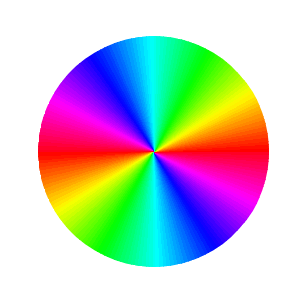

/Users/marcoaqil/prfpytools/prfpytools/postproc_utils.py:737: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(t, r, tg.T, norm=norm, cmap=cmap)


<IPython.core.display.Javascript object>


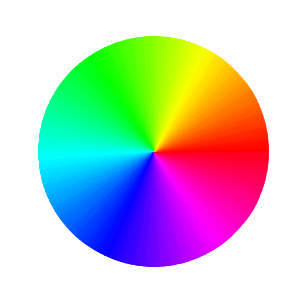

Started server on port 13848
-----


In [69]:
%matplotlib notebook
#visualize subject-specific ROIs and timeseries stats
#compare t1w and surface fitting rsq and polar angle maps
vis_res.compare_volume_surface = False

vis_res.plot_rois_cortex = False
vis_res.plot_stats_cortex = False
vis_res.plot_rsq_cortex = False
vis_res.plot_ecc_cortex = False
vis_res.plot_polar_cortex = True
vis_res.plot_size_cortex = False
vis_res.plot_amp_cortex = False
vis_res.plot_css_exp_cortex = False
vis_res.plot_surround_size_cortex = False
vis_res.plot_suppression_index_cortex = False
vis_res.plot_norm_baselines_cortex = False
vis_res.plot_size_ratio_cortex = False
vis_res.plot_receptors_cortex = False
vis_res.plot_hrf_cortex = False
#set these to None if not wanted. 
vis_res.plot_correlations_per_roi = None#{'x_params_topl':['Norm Param. B'], 'y_params_topl':['Receptor Maps'],
                                    # 'x_params_lowl':['Norm_abcd'], 'y_params_lowl':['GABA'],
                                    # 'atlas':'glasser'} #glasser, HCPQ1Q6, custom
#note there is no quantile exclusion here, so the means may suffer from extreme values. just a visualization tool; use the quant_plots if want to be sure
vis_res.plot_means_per_roi = None#{'y_params_topl':['Norm Param. B','Norm Param. D','Size ratio (sigma_2/sigma_1)'], 
                                 #   'y_params_lowl':['Norm_abcd'], 
                                 #    'atlas':'glasser'} #glasser, HCPQ1Q6, custom
#output FS-format polar angle and eccentricity maps for freeview ROI plotting
vis_res.output_freesurfer_maps = False

vis_res.plot_diffs = False
param_diffs = ['Norm Param.','Variance', 'Noise']#['hrf', 'Norm Param.']#['Variance', 'Noise']#, 'TSNR', 'Mean', 'Variance']

rsq_thresh = 0.0
rsq_max_opacity = rsq_thresh+1e-3

#left, right = cortex.db.fsaverage.surfaces.inflated.get()
#points = np.concatenate((left[0],right[0]))
#left_flat, right_flat = cortex.db.fsaverage.surfaces.flat.get()
#points_flat = np.concatenate((left_flat[0],right_flat[0]))

#nodorsal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points_flat[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<50 and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]
#nofrontal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
rois = 'Brain'#['custom.hV4']#'all'#['custom.hV4']#'['custom.hV4']#'all'#['custom.hV4']#'all'#['custom.V1', 'custom.V2', 'custom.V3']
space_names = 'fsnative'# 'fsnative'#'fsaverage'#'HCP'#
analysis_names = ['fit-task-2R_fit-runs-all']#'Mean analysis''fit-task-BAR_fit-runs-CVmedian'#'fit-task-2R_fit-runs-all'#'fit-task-4R_fit-runs-all'# #'Mean analysis'#
subject_ids =  ['sub-013_ses-all']#['sub-008_ses-all','sub-011_ses-all','sub-012_ses-all','sub-013_ses-all','sub-020_ses-all']#[s for s in vis_res.groups_dict['10mg']]# if 'sub-001' in s] #['sub-006_ses-3']#  if '007' in s]#,'sub-006_ses-2','sub-006_ses-3']#,'sub-007_ses-3','sub-007_ses-2']#,'sub-001_ses-2','sub-001_ses-3']# 'all'#['sub-001_ses-1']#,'sub-001_ses-2','sub-002_ses-1']#['fsaverage_cvrsq']#['fsaverage_hcp1sthalf','fsaverage_hcp2ndhalf']#['sub-006']##'all'#['sub-001']
excluded_rois = []#['excl_v123']

vis_res.set_alpha(space_names = [space_names], only_models=['Norm_abcd'], # alpha_weight='Mean Masked RSq 10mg-placebo',
                  ecc_min=0.0, ecc_max=5.3, threshold_li=False, excluded_rois=excluded_rois)
pycortex_image_path = '/Volumes/Crucial_X8/SM-pRF/Figures/nordic_pybest'

vis_res.pycortex_plots(rois, rsq_thresh, space_names, analysis_names, subject_ids, rsq_max_opacity = rsq_max_opacity, pycortex_cmap = 'RdBu_r', #'nipy_spectral',## 'nipy_spectral',# 'RdBu_r',
                     # 'nipy_spectral',#'jet_r',                                        
                     #  roi_borders_name = 'custom',
                       #specify this path to save colormap pDFs
                      # pycortex_image_path = pycortex_image_path, save_colorbars=True,
                       param_diffs = param_diffs,
                       timecourse_folder = '/Volumes/Crucial_X8/SM-pRF/derivatives/timecourses',#'/Volumes/Crucial_X8/PRFMapping/PRFMapping-Deriv-hires/prfpy/FS7_results/timecourses',#'/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/timecourses',##'
                       screenshot_paths = ['/Volumes/Crucial_X8/SM-pRF/derivatives/2R_Screenshots'])
                                        # ['/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETBAR_small.hdf5'])
                                         #  '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETBAR2_small.hdf5',
                                         #  '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETCW_small.hdf5',
                                         #  '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETCCW_small.hdf5',
                                          # '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETEXP_small.hdf5',
                                           #'/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETCON_small.hdf5'])
                                            #'/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETBAR_small.hdf5'
                                            #'/Volumes/Crucial_X8/PRFMapping/PRFMapping-Deriv-hires/prfpy/FS7_results/timecourses/task-2R_screenshots'

### Pycortex figs

In [ ]:
vis_res.js_handle_dict[space_names][analysis_names][subject_ids[0]].keys()

In [ ]:
vis_res.js_handle_dict[space_names][analysis_names][subject_ids[0]]['rsq'].dataviews.attrs.keys()

In [ ]:
save_views=True
time.sleep(1)
if save_views:
    #capture pycortex views
    space = space_names
    analysis = analysis_names
    subj = subject_ids[0]
    if space == 'fsaverage':
        pyc_subj = 'fsaverage'
    else:
        pyc_subj = subj.split('_')[0]
        
    js_handle = 'rsq'
    #param_to_save = 'Norm_abcd Param. B'
    for param_to_save in [f'{subj} Norm_abcd - Gauss']:# vis_res.js_handle_dict[space][analysis][subj][js_handle].dataviews.attrs.keys():
        views_dict = {'occipital_inflated_r':{f'surface.{pyc_subj}.unfold':1, f'surface.{pyc_subj}.specularity':0,
                                            'camera.target':[-10,20,25],
                                             'camera.azimuth':205, 'camera.altitude':109, 'camera.radius':261,
                                             'camera.pivot':0},
                     'occipital_inflated_l':{f'surface.{pyc_subj}.unfold':1, f'surface.{pyc_subj}.specularity':0,
                                            'camera.target':[-10,20,25],
                                             'camera.azimuth':166, 'camera.altitude':109, 'camera.radius':261,
                                             'camera.pivot':0}}

        vis_res.save_pycortex_views(space, analysis, subj, js_handle, param_to_save,
                                    views_dict, image_path = vis_res.pycortex_image_path)
        

### Groups

In [7]:
groups_dict = {'placebo':['sub-001_ses-1','sub-002_ses-2','sub-003_ses-3','sub-004_ses-2','sub-005_ses-1','sub-006_ses-3','sub-007_ses-3','sub-008_ses-1',
                         'sub-009_ses-2','sub-010_ses-1','sub-011_ses-3','sub-012_ses-2','sub-013_ses-3','sub-014_ses-2','sub-015_ses-2','sub-018_ses-1','sub-019_ses-2','sub-020_ses-1'],
               
              '5mg':['sub-001_ses-3','sub-002_ses-1','sub-003_ses-1','sub-004_ses-3','sub-005_ses-2','sub-006_ses-1','sub-007_ses-1','sub-008_ses-3',
                    'sub-009_ses-1','sub-010_ses-2','sub-011_ses-2','sub-012_ses-3','sub-013_ses-2','sub-014_ses-1','sub-015_ses-3','sub-018_ses-3','sub-019_ses-1','sub-020_ses-2'],
               
              '10mg':['sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2','sub-008_ses-2',
                     'sub-009_ses-3','sub-010_ses-3','sub-011_ses-1','sub-012_ses-1','sub-013_ses-1','sub-014_ses-3','sub-015_ses-1','sub-018_ses-2','sub-019_ses-3','sub-020_ses-3']}#,

vis_res.set_alpha(space_names = ['fsnative'], only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=5.3, threshold_li=False, excluded_rois=[])

vis_res.define_groups(groups_dict)
vis_res.compute_diff(space_names = 'fsnative', analysis_names = 'all', subject_ids='all',parameter_names='all',base_group='placebo')
vis_res.compute_ratio(space_names = 'fsnative', analysis_names = 'all', subject_ids='all',parameter_names='all',base_group='placebo')

fsnative fit-task-2R_fit-runs-all sub-001_ses-1
fsnative fit-task-2R_fit-runs-all sub-001_ses-2
fsnative fit-task-2R_fit-runs-all sub-001_ses-3
fsnative fit-task-2R_fit-runs-all sub-001_ses-all
fsnative fit-task-2R_fit-runs-all sub-002_ses-1
fsnative fit-task-2R_fit-runs-all sub-002_ses-2
fsnative fit-task-2R_fit-runs-all sub-002_ses-3
fsnative fit-task-2R_fit-runs-all sub-002_ses-all
fsnative fit-task-2R_fit-runs-all sub-003_ses-1
fsnative fit-task-2R_fit-runs-all sub-003_ses-2
fsnative fit-task-2R_fit-runs-all sub-003_ses-3
fsnative fit-task-2R_fit-runs-all sub-003_ses-all
fsnative fit-task-2R_fit-runs-all sub-004_ses-1
fsnative fit-task-2R_fit-runs-all sub-004_ses-2
fsnative fit-task-2R_fit-runs-all sub-004_ses-3
fsnative fit-task-2R_fit-runs-all sub-004_ses-all
fsnative fit-task-2R_fit-runs-all sub-005_ses-1
fsnative fit-task-2R_fit-runs-all sub-005_ses-2
fsnative fit-task-2R_fit-runs-all sub-005_ses-3
fsnative fit-task-2R_fit-runs-all sub-005_ses-all
fsnative fit-task-2R_fit-runs-

/Users/marcoaqil/prfpytools/prfpytools/visualize_results.py:284: RuntimeWarning: divide by zero encountered in divide
  p_r[f'{param} {current_sj_group}/{base_group}'][model] = p_r[param][model] / p_r_pla[param][model]
/Users/marcoaqil/prfpytools/prfpytools/visualize_results.py:284: RuntimeWarning: invalid value encountered in divide
  p_r[f'{param} {current_sj_group}/{base_group}'][model] = p_r[param][model] / p_r_pla[param][model]


In [ ]:
vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all']['sub-001_ses-2']['Processed Results'].keys()

### saving data for decoding

In [ ]:
msk = vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all']['sub-001_ses-1']['mask']

In [ ]:
np.save('/Volumes/Crucial_X8/sub-001_ses-1_custom-V1.npy',vis_res.idx_rois['sub-001_ses-1']['custom.V1'])

In [ ]:
with open('/Volumes/Crucial_X8/sub-001_ses-1_results-gauss.pickle', 'wb') as handle:
    res = vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all']['sub-001_ses-1']['Results']['Gauss']
    fullres = np.zeros((msk.shape[0],res.shape[1]))
    fullres[msk] = np.copy(res)
    dill.dump(fullres, handle)

In [ ]:
with open('/Volumes/Crucial_X8/Gauss_2R_prf_model.pickle', 'wb') as handle:
     dill.dump(vis_res.prf_models['Gauss'], handle)

### Timecourse plots

In [ ]:
#3493
while not hasattr(vis_res, 'f'):
    time.sleep(2)
else:
    pass #45227 43237 #216466
vis_res.f

In [ ]:
vis_res.f.savefig(f'/Users/marcoaqil/compr2.pdf', dpi=600, bbox_inches='tight', transparent=True)

# 1D quantitative plots

In [162]:
%%capture capt
pl.close('all')
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'#'A/C'
#D/B#D*sigma_2/sigma_1#(D*sigma_2)/(B*sigma_1)#'(AD-BC)/D**2 (deriv at 0)'#(Cs_2**2+D)/(As_1**2+B)
#(B*sigma_1)/(D*sigma_2)##B/D**2#'B/sqrt(D)'#'B(1/(Cpis_2**2+D)-1/D)'
####DoG
#'Surround volume (full)'#'Surround/Centre Amplitude' #'Surround-Centre Amplitude'#'Surround-Centre Volume'
#'Timecourse Neg/Pos Area Ratio'
#['GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#fsnative vox vol for correction: 4.8270. HCP 4.096. smPRF 5.832

#'custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS'
#combined all_custom Brain
#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
left, right = cortex.db.fsaverage.surfaces.inflated.get()
points = np.concatenate((left[0],right[0]))
left_flat, right_flat = cortex.db.fsaverage.surfaces.flat.get()
points_flat = np.concatenate((left_flat[0],right_flat[0]))

#nodorsal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points_flat[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<40 and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-50]
#nofrontal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]

#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]#['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS'] #[roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#[-20:]#['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS'] #fsaverage
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'LO1', 'LO2', 'TO1', 'TO2', 'V3A', 'V3B', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'FEF']
# rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
# 'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
# 'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC','combined']

rois = ['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS','combined']#['custom.V1','custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS','all_custom']

#rois = ['all_custom']
#rois = ['HCPQ1Q6.V1', 'HCPQ1Q6.V2', 'HCPQ1Q6.V3', 'HCPQ1Q6.V3AB',
#        'HCPQ1Q6.LO', 'HCPQ1Q6.V7','HCPQ1Q6.TO',
#        'HCPQ1Q6.IPS1']
#rois.append('combined')

rsq_thresh = 0.0 #0.3 #0.1 (eccmon 0,1/5 (eccmin 0 /15))
save_figures = True
figure_path = f"/Volumes/Crucial_X8/SM-pRF/Figures/10mg_diffs_test_weightstats"

#set to 'all' to plot all analyses
space_names = 'fsnative'
analysis_names = 'fit-task-2R_fit-runs-all'#'Mean analysis'#'fit-task-BAR_fit-runs-all'#'all'#, -CVmedian
subject_ids = [s for s in vis_res.groups_dict['10mg']]

#[ 'sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2']
            #['sub-001_ses-1','sub-002_ses-2','sub-003_ses-3','sub-004_ses-2','sub-005_ses-1','sub-006_ses-3','sub-007_ses-3']#,
            # ['sub-001_ses-3','sub-002_ses-1','sub-003_ses-1','sub-004_ses-3','sub-005_ses-2','sub-006_ses-1','sub-007_ses-1']#,
            #  'sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2']#['fsaverage_cvrsq']#[sj for sj in vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-all'].keys() if 'fsaverage' not in sj]#['fsaverage_cvrsq']#['fsaverage']#['sub-001','sub-002','sub-006']#
excluded_rois = []# ['excl_v123']

vis_res.set_alpha(only_models=['Norm_abcd'], alpha_weight='Mean Masked RSq 10mg-placebo', ecc_min=0.0, ecc_max=5.3, threshold_li=False, excluded_rois=excluded_rois)

ylim={}
xlim={}

#set model/roi specific x-y limitd

#ylim = {'Mean':(1.5,14), 'Norm_abcd':(1.5,14), 'Gauss':(1.5,14), 'CSS':(1.5,14), 'DoG':(1.5,14)}
#xlim = {'Gauss':(0,4.5), 'DoG':(0,4.5), 'CSS':(0,4.5), 'Norm_abcd':(0,4.5)}
#dog rsq
#ylim = {'Norm_abcd':(-5,310)}
#xlim = {'Norm_abcd':(-0.005,0.155)}
#dog tcsi
#xlim = {'Norm_abcd':(-0.02,1.33)}
#for r in rois:
    #xlim[r] = xlim['Norm_abcd']
    #ylim[r] = ylim['Norm_abcd']
    #size ratio
#xlim = {'Norm_abcd':(-0.02,0.8)}
#ylim = {'Norm_abcd':(2,11)}

#         if r in ['custom.V1', 'custom.V2', 'custom.V3']:
#             ylim[r] = (1.5,14)
#         elif r in ['custom.V3AB', 'custom.hV4', 'custom.LO']:
#             ylim[r] = (1.5,14)
#         else:
#             ylim[r] = (1.5,14)
#['Single run Variance','Variance of mean timecourse'],#['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
#                             parameters = ['Variance Stats 10mg-placebo'],
for x_parameter in ['Eccentricity']:#'PCA Component 0','PCA Component 1','PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
    for y_parameter in ['Norm Param. B 10mg-placebo','Norm Param. D 10mg-placebo', 'Ratio (B/D) 10mg-placebo', 'Size ratio (sigma_2/sigma_1) 10mg-placebo','Amplitude 10mg-placebo','Surround Amplitude 10mg-placebo','Size (sigma_1) 10mg-placebo','Size (sigma_2) 10mg-placebo','hrf_1 10mg-placebo','RSq 10mg-placebo']: #'B/C', 'B/A', '(B*C)/A', '(B+C)/A', 'C/(A+B)',  'C/A']
    
                        #'Single run Variance','Variance of mean timecourse']
    #['Noise Ceiling (CC)']:
    
    #['Norm Param. B 10mg-placebo','Norm Param. D 10mg-placebo', 'Ratio (B/D) 10mg-placebo', 'Size ratio (sigma_2/sigma_1) 10mg-placebo','Amplitude 10mg-placebo','Surround Amplitude 10mg-placebo','Size (sigma_1) 10mg-placebo','Size (sigma_2) 10mg-placebo','hrf_1 10mg-placebo','RSq 10mg-placebo']: #'B/C', 'B/A', '(B*C)/A', '(B+C)/A', 'C/(A+B)',  'C/A']

    #         if y_parameter == 'RSq':
#             ylim = {'Norm_abcd':(0.15,0.625)}
#         if y_parameter == 'Norm Param. B':
#             ylim = {'Norm_abcd':(0,80)}
#         if y_parameter == 'Norm Param. D':
#             ylim = {'Norm_abcd':(0,60)}

       # ylim = {'Norm_abcd':(-5,135)}
#         if x_parameter == 'GABA_A':
#             xlim = {'Norm_abcd':(720,1080)}
#         elif x_parameter == '5-HT1A':
#             xlim = {'Norm_abcd':(7,43)}
#         elif x_parameter == '5-HT1B':
#             xlim = {'Norm_abcd':(13,32)}
#         elif x_parameter == '5-HT2A':
#             xlim = {'Norm_abcd':(39,66)}    

        #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
        vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
                                        space_names, analysis_names, subject_ids,
                                       # x_parameter_toplevel='Receptor Maps',  
                            
                           # y_parameter_toplevel='Variance Stats',#'Noise Ceiling 10mg-placebo',         
                            weights='Mean Masked RSq 10mg-placebo',    
                            
                                        diff_gauss=False, diff_gauss_x=False, 
                                        diff_norm=False,
                                        log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size',      
                                        scatter=False, violin=False, stats_on_plot=True, zconfint_err_alpha=None,
                                        xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
                                         means_only=True, 
                                        rois_on_plot = False, rsq_alpha_plot = True,
                                        fit = False, exp_fit = False, show_legend = False, 
                                        each_subj_on_group=True, bold_voxel_volume=5.832,
                                        quantile_exclusion=0.999)#, x_param_model='DoG')

# for x_parameter in ['PCA Component 0','PCA Component 1','PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)']:#'Norm Param. D']:#@

# for x_parameter in ['Eccentricity']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Norm Param. D']:#'Norm Param. D']:#@
#        # ylim = {'Norm_abcd':(23,72)}#{'Norm_abcd':(5,44)}
# #         if x_parameter == '5-HT1B':
# #             xlim = {'Norm_abcd':(13,32)}
# #         else:
# #             xlim = {'Norm_abcd':(39,66)}    
            
#         #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
#         vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
#                                         space_names, analysis_names, subject_ids,
#                                         x_parameter_toplevel=None,#'Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
#                                         diff_gauss=False, diff_gauss_x=False, 
#                                         log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
#                                         scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
#                                         xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
#                                          means_only=True, 
#                                         rois_on_plot = True, rsq_alpha_plot = True,
#                                         fit = False, exp_fit = False, show_legend = False, 
#                                         each_subj_on_group=True, bold_voxel_volume=4.096,
#                                         quantile_exclusion=0.999)#, x_param_model='DoG')
        
# for x_parameter in ['PCA Component 0', 'PCA Component 1', 'PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)']:#'Norm Param. D']:#@
# #         ylim = {'Norm_abcd':(25,75)}#{'Norm_abcd':(5,44)}
# #         if x_parameter == '5-HT1B':
# #             xlim = {'Norm_abcd':(13,32)}
# #         else:
# #             xlim = {'Norm_abcd':(39,66)}    
            
#         #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
#         vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
#                                         space_names, analysis_names, subject_ids,
#                                         x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
#                                         diff_gauss=False, diff_gauss_x=False, 
#                                         log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
#                                         scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
#                                         xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
#                                          means_only=False, 
#                                         rois_on_plot = True, rsq_alpha_plot = True,
#                                         fit = False, exp_fit = False, show_legend = False, 
#                                         each_subj_on_group=True, bold_voxel_volume=4.096,
#                                         quantile_exclusion=0.999)#, x_param_model='DoG')

os.system(f"open {sound_file}")


In [40]:
%%capture capt
pl.close('all')
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'#'A/C'
#D/B#D*sigma_2/sigma_1#(D*sigma_2)/(B*sigma_1)#'(AD-BC)/D**2 (deriv at 0)'#(Cs_2**2+D)/(As_1**2+B)
#(B*sigma_1)/(D*sigma_2)##B/D**2#'B/sqrt(D)'#'B(1/(Cpis_2**2+D)-1/D)'
####DoG
#'Surround volume (full)'#'Surround/Centre Amplitude' #'Surround-Centre Amplitude'#'Surround-Centre Volume'
#'Timecourse Neg/Pos Area Ratio'
#['GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#fsnative vox vol for correction: 4.8270. HCP 4.096

#'custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS'
#combined all_custom Brain
#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
left, right = cortex.db.fsaverage.surfaces.inflated.get()
points = np.concatenate((left[0],right[0]))
left_flat, right_flat = cortex.db.fsaverage.surfaces.flat.get()
points_flat = np.concatenate((left_flat[0],right_flat[0]))

#nodorsal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points_flat[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<40 and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-50]
#nofrontal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]

rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#[-20:]#['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS'] #fsaverage
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'LO1', 'LO2', 'TO1', 'TO2', 'V3A', 'V3B', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'FEF']
# rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
# 'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
# 'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC','combined']
#rois = ['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS','combined']
#rois = ['all_custom']
#rois = ['HCPQ1Q6.V1', 'HCPQ1Q6.V2', 'HCPQ1Q6.V3', 'HCPQ1Q6.V3AB',
#        'HCPQ1Q6.LO', 'HCPQ1Q6.V7','HCPQ1Q6.TO',
#        'HCPQ1Q6.IPS1']
#rois.append('combined')

rsq_thresh = 0.3 #0.3
save_figures = True
figure_path = f"/Volumes/Crucial_X8/SM-pRF/Figures/10mg_diffs_test_weightstats_corrs"


#set to 'all' to plot all analyses
space_names = 'fsaverage'
analysis_names = 'fit-task-2R_fit-runs-all'#'fit-task-BAR_fit-runs-all'#'Mean analysis'#'fit-task-BAR_fit-runs-all'#'all'#, -CVmedian
subject_ids = ['fsaverage']#['fsaverage']#['sub-001','sub-002','sub-006']#
excluded_rois = ['excl_v123']

vis_res.set_alpha(only_models=['Norm_abcd'], alpha_weight='Mean Masked RSq 10mg-placebo', ecc_min=0.0, ecc_max=5.3, threshold_li=False, excluded_rois=[])

ylim={}
xlim={}

#set model/roi specific x-y limitd

#ylim = {'Mean':(1.5,14), 'Norm_abcd':(1.5,14), 'Gauss':(1.5,14), 'CSS':(1.5,14), 'DoG':(1.5,14)}
#xlim = {'Gauss':(0,4.5), 'DoG':(0,4.5), 'CSS':(0,4.5), 'Norm_abcd':(0,4.5)}
#dog rsq
#ylim = {'Norm_abcd':(-5,310)}
#xlim = {'Norm_abcd':(-0.005,0.155)}
#dog tcsi
#xlim = {'Norm_abcd':(-0.02,1.33)}
#for r in rois:
    #xlim[r] = xlim['Norm_abcd']
    #ylim[r] = ylim['Norm_abcd']
    #size ratio
#xlim = {'Norm_abcd':(-0.02,0.8)}
#ylim = {'Norm_abcd':(2,11)}

#         if r in ['custom.V1', 'custom.V2', 'custom.V3']:
#             ylim[r] = (1.5,14)
#         elif r in ['custom.V3AB', 'custom.hV4', 'custom.LO']:
#             ylim[r] = (1.5,14)
#         else:
#             ylim[r] = (1.5,14)

for x_parameter in ['GABA_A', '5-HT1A']:#'PCA Component 0','PCA Component 1','PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
    for y_parameter in ['Norm Param. B 10mg/placebo']:
        
        #ylim = {'Norm_abcd':(-5,135)}
#         if x_parameter == 'GABA_A':
#             xlim = {'Norm_abcd':(720,1080)}
#         else:
#             xlim = {'Norm_abcd':(7,43)}
               
        #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
        vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
                                        space_names, analysis_names, subject_ids,
                                        x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',  
                            
                             weights='Mean Masked RSq 10mg-placebo',    
                            
                                        diff_gauss=False, diff_gauss_x=False, 
                                        log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', 
                                        scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
                                        xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
                                         means_only=False, 
                                        rois_on_plot = True, rsq_alpha_plot = True,
                                        fit = False, exp_fit = False, show_legend = False, 
                                        each_subj_on_group=True, bold_voxel_volume=5.832,
                                        quantile_exclusion=0.999)#, x_param_model='DoG')

# for x_parameter in ['PCA Component 0','PCA Component 1','PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)']:#'Norm Param. D']:#@

for x_parameter in ['5-HT1B', '5-HT2A']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
    for y_parameter in ['Norm Param. D 10mg/placebo']:#'Norm Param. D']:#@
        #ylim = {'Norm_abcd':(23,72)}#{'Norm_abcd':(5,44)}
#         if x_parameter == '5-HT1B':
#             xlim = {'Norm_abcd':(13,32)}
#         else:
#             xlim = {'Norm_abcd':(39,66)}    
            
        #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
        vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
                                        space_names, analysis_names, subject_ids,
                                        x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',     
                            
                             weights='Mean Masked RSq 10mg-placebo',    
                            
                                        diff_gauss=False, diff_gauss_x=False, 
                                        log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size',
                                        scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
                                        xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
                                         means_only=False, 
                                        rois_on_plot = True, rsq_alpha_plot = True,
                                        fit = False, exp_fit = False, show_legend = False, 
                                        each_subj_on_group=True, bold_voxel_volume=5.832,
                                        quantile_exclusion=0.999)#, x_param_model='DoG')
        
# for x_parameter in ['PCA Component 0', 'PCA Component 1', 'PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)']:#'Norm Param. D']:#@
# #         ylim = {'Norm_abcd':(25,75)}#{'Norm_abcd':(5,44)}
# #         if x_parameter == '5-HT1B':
# #             xlim = {'Norm_abcd':(13,32)}
# #         else:
# #             xlim = {'Norm_abcd':(39,66)}    
            
#         #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
#         vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
#                                         space_names, analysis_names, subject_ids,
#                                         x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
#                                         diff_gauss=False, diff_gauss_x=False, 
#                                         log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
#                                         scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
#                                         xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
#                                          means_only=False, 
#                                         rois_on_plot = True, rsq_alpha_plot = True,
#                                         fit = False, exp_fit = False, show_legend = False, 
#                                         each_subj_on_group=True, bold_voxel_volume=4.096,
#                                         quantile_exclusion=0.999)#, x_param_model='DoG')

os.system(f"open {sound_file}")


In [ ]:
%%capture capt
pl.close('all')
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'#'A/C'
#D/B#D*sigma_2/sigma_1#(D*sigma_2)/(B*sigma_1)#'(AD-BC)/D**2 (deriv at 0)'#(Cs_2**2+D)/(As_1**2+B)
#(B*sigma_1)/(D*sigma_2)##B/D**2#'B/sqrt(D)'#'B(1/(Cpis_2**2+D)-1/D)'
####DoG
#'Surround volume (full)'#'Surround/Centre Amplitude' #'Surround-Centre Amplitude'#'Surround-Centre Volume'
#'Timecourse Neg/Pos Area Ratio'
#['GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#fsnative vox vol for correction: 4.8270. HCP 4.096

#'custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS'
#combined all_custom Brain
#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
left, right = cortex.db.fsaverage.surfaces.inflated.get()
points = np.concatenate((left[0],right[0]))
left_flat, right_flat = cortex.db.fsaverage.surfaces.flat.get()
points_flat = np.concatenate((left_flat[0],right_flat[0]))

#nodorsal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points_flat[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<40 and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-50]
#nofrontal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]

rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#[-20:]#['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS'] #fsaverage
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'LO1', 'LO2', 'TO1', 'TO2', 'V3A', 'V3B', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'FEF']
# rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
# 'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
# 'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC','combined']
#rois = ['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS','combined']
#rois = ['all_custom']
#rois = ['HCPQ1Q6.V1', 'HCPQ1Q6.V2', 'HCPQ1Q6.V3', 'HCPQ1Q6.V3AB',
#        'HCPQ1Q6.LO', 'HCPQ1Q6.V7','HCPQ1Q6.TO',
#        'HCPQ1Q6.IPS1']
#rois.append('combined')

rsq_thresh = 0.1 #0.3
save_figures = True
figure_path = f"/Volumes/Crucial_X8/PRFMapping/Figures/spinoza_res_010_thresh_ecc45_xpermstats_noresamp_1e6perm"

#set to 'all' to plot all analyses
space_names = 'fsaverage'
analysis_names = 'fit-task-2R_fit-runs-all'#'fit-task-BAR_fit-runs-all'#'Mean analysis'#'fit-task-BAR_fit-runs-all'#'all'#, -CVmedian
subject_ids = ['fsaverage']#['fsaverage']#['sub-001','sub-002','sub-006']#
excluded_rois = ['excl_v123']

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=4.5, threshold_li=False, excluded_rois=[])

ylim={}
xlim={}

#set model/roi specific x-y limitd

#ylim = {'Mean':(1.5,14), 'Norm_abcd':(1.5,14), 'Gauss':(1.5,14), 'CSS':(1.5,14), 'DoG':(1.5,14)}
#xlim = {'Gauss':(0,4.5), 'DoG':(0,4.5), 'CSS':(0,4.5), 'Norm_abcd':(0,4.5)}
#dog rsq
#ylim = {'Norm_abcd':(-5,310)}
#xlim = {'Norm_abcd':(-0.005,0.155)}
#dog tcsi
#xlim = {'Norm_abcd':(-0.02,1.33)}
#for r in rois:
    #xlim[r] = xlim['Norm_abcd']
    #ylim[r] = ylim['Norm_abcd']
    #size ratio
#xlim = {'Norm_abcd':(-0.02,0.8)}
#ylim = {'Norm_abcd':(2,11)}

#         if r in ['custom.V1', 'custom.V2', 'custom.V3']:
#             ylim[r] = (1.5,14)
#         elif r in ['custom.V3AB', 'custom.hV4', 'custom.LO']:
#             ylim[r] = (1.5,14)
#         else:
#             ylim[r] = (1.5,14)

for x_parameter in ['GABA_A', '5-HT1A']:#'PCA Component 0','PCA Component 1','PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
    for y_parameter in ['Norm Param. B']:
        
        #ylim = {'Norm_abcd':(-5,135)}
#         if x_parameter == 'GABA_A':
#             xlim = {'Norm_abcd':(720,1080)}
#         else:
#             xlim = {'Norm_abcd':(7,43)}
               
        #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
        vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
                                        space_names, analysis_names, subject_ids,
                                        x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
                                        diff_gauss=False, diff_gauss_x=False, 
                                        log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
                                        scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
                                        xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
                                         means_only=False, 
                                        rois_on_plot = True, rsq_alpha_plot = True,
                                        fit = False, exp_fit = False, show_legend = False, 
                                        each_subj_on_group=True, bold_voxel_volume=4.8270,
                                        quantile_exclusion=0.999)#, x_param_model='DoG')

# for x_parameter in ['PCA Component 0','PCA Component 1','PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)']:#'Norm Param. D']:#@

for x_parameter in ['5-HT1B', '5-HT2A']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
    for y_parameter in ['Norm Param. D']:#'Norm Param. D']:#@
        #ylim = {'Norm_abcd':(23,72)}#{'Norm_abcd':(5,44)}
#         if x_parameter == '5-HT1B':
#             xlim = {'Norm_abcd':(13,32)}
#         else:
#             xlim = {'Norm_abcd':(39,66)}    
            
        #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
        vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
                                        space_names, analysis_names, subject_ids,
                                        x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
                                        diff_gauss=False, diff_gauss_x=False, 
                                        log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
                                        scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
                                        xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
                                         means_only=False, 
                                        rois_on_plot = True, rsq_alpha_plot = True,
                                        fit = False, exp_fit = False, show_legend = False, 
                                        each_subj_on_group=True, bold_voxel_volume=4.8270,
                                        quantile_exclusion=0.999)#, x_param_model='DoG')
        
# for x_parameter in ['PCA Component 0', 'PCA Component 1', 'PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)']:#'Norm Param. D']:#@
# #         ylim = {'Norm_abcd':(25,75)}#{'Norm_abcd':(5,44)}
# #         if x_parameter == '5-HT1B':
# #             xlim = {'Norm_abcd':(13,32)}
# #         else:
# #             xlim = {'Norm_abcd':(39,66)}    
            
#         #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
#         vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
#                                         space_names, analysis_names, subject_ids,
#                                         x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
#                                         diff_gauss=False, diff_gauss_x=False, 
#                                         log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
#                                         scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
#                                         xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
#                                          means_only=False, 
#                                         rois_on_plot = True, rsq_alpha_plot = True,
#                                         fit = False, exp_fit = False, show_legend = False, 
#                                         each_subj_on_group=True, bold_voxel_volume=4.096,
#                                         quantile_exclusion=0.999)#, x_param_model='DoG')

os.system(f"open {sound_file}")


# Multidimensional analyses

## OLS

In [ ]:
#%%capture
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
pl.close('all')
#fsnative vox vol for correction: 4.8270
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'
#'A/C'
####DoG
#'Surround volume (full)'
#'Surround/Centre Amplitude' 
#'Surround-Centre Amplitude'
#'Surround-Centre Volume'

#parameters = ['Eccentricity', 'Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)', 'Amplitude','Surround Amplitude', 'Polar Angle',
#              '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A','Amplitude','Surround Amplitude', 'RSq']#,]#'Size ratio (sigma_2/sigma_1)']# 'Size (sigma_1)', 'Size (sigma_2)', 'Amplitude','Surround Amplitude']

parameters = ['5-HT1A', '5-HT1B', '5-HT2A', 'GABA_A', '5-HTT','Norm Param. B', 'C/(A+B)', 'C/D', 'Norm Param. D', 'Size ratio (sigma_2/sigma_1)', 'RSq']#, 'Eccentricity','Size (sigma_1)','Size (sigma_2)']#

x_dims_idx = [1,2]
y_dims_idx = [6]

#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
#rois = ['V1', 'V2', 'V3','V3AB','hV4','LO','TO','VO','IPS']#, 'combined']#['Brain'] #'V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS','combined', 
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'LO1', 'LO2', 'TO1', 'TO2', 'V3A', 'V3B', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'FEF']
#rois = ['all_custom']
rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]# and 'V1' not in roi]
# rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
# 'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
# 'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC']
rois.append('combined')
        
rsq_thresh = 0.0
save_figures= False
figure_path = '/Volumes/Crucial_X8/PRFMapping/Figures/attemptwnames_wang_ecc65rsq015/ols'

space_names = 'fsaverage'
#set to 'all' to plot all analyses
analysis_names = 'fit-task-BAR_fit-runs-all'#-CVmedian

subject_ids = ['fsaverage_cvrsq']#_1sthalf', 'fsaverage_cvrsq_2ndhalf']#']#_1sthalf', 'fsaverage_cvrsq_2ndhalf']#fsaverage, fsaverage_cvrsq, 'fsaverage_hcp1sthalf', 'fsaverage_hcp2ndhalf']

excluded_rois = ['excl_v123']

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=8.0, threshold_li=True, excluded_rois=excluded_rois)

#ols_results = dict()
#for y_dims_idx in [[5],[6]]:
#    for x_dims_idx in [[3, 4], [2, 4], [2, 3], [1, 4], [1, 3], [1, 2], [0, 4], [0, 3], [0, 2], [0, 1]]: #combinations:#

vis_res.multidim_analysis(parameters, rois, rsq_thresh, save_figures, figure_path, space_names = space_names, parameter_toplevel='Receptor Maps', rsq_weights= True,
                    analysis_names = analysis_names, subject_ids = subject_ids, x_dims_idx=x_dims_idx, y_dims_idx=y_dims_idx,
                          zscore_data= False, zscore_data_across_rois = False, 
                          size_response_curves = False, plot_corr_matrix = False, perform_ols = True, polar_plots = False,
                             cv_regression = False, bold_voxel_volume=4.096, zconfint_err_alpha=None, quantile_exclusion=0.999,
                          #vis_pca_comps_rois: fr which rois to make pca comp beta plots; 
                          #vis_pca_comps_axes: which comps to use in 2d plot of mean pca comp per roi
                        perform_pca = False, vis_pca_pycortex = True, vis_pca_comps_rois = ['combined'], vis_pca_comps_axes = [0,1], rsq_alpha_pca_plot = True,
                          perform_pls = False, vis_pls_pycortex = False)
        
 #       mergedict_OR(ols_results, vis_res.ols_result_dict)

os.system(f"open {sound_file}")


In [ ]:
vis_res.ols_3d_fig.savefig('/Volumes/Crucial_X8/PRFMapping/Figures/OLS figs/normB_OLS_angle_view.pdf',dpi=600, bbox_inches='tight')

In [ ]:
(gaba alone wCCcv:0.63, 1A alone wCCcv:-0.67). together wCCcv:0.85.  '5-HT1A' pval<10^-6, 'GABA_A' pval<10^-6 
(1B alone wCCcv:0.44, 2A alone wCCcv:-0.17). together wCCcv:0.58. '5-HT1B' pval=0.0000270 '5-HT2A' pval=0.0047390    
    
no V1
wCC_cv: (5-HT1B alone has 0.22, 5-HT2A 0.19) 0.4370
5-HT1B pval=0.0041210
5-HT2A pval=0.0128170

In [ ]:
wCC prediction (fit on roi means, eval on roi means) 0.2669
Estimated OLS betas (fit on roi means) C/D Norm_abcd [-3543.5831  -355.2544]

5-HT1B pval=0.1020640
5-HT2A pval=0.7449550


In [ ]:
import itertools

N = 4
numbers = list(range(N+1))

combinations = []
for i in range(1, N+2):
    combinations.extend(itertools.combinations(numbers, i))

print(combinations)

In [ ]:
for key in ols_results:
    this_param_model = []
    rec_models = []
    this_param_betas = []
    for key2 in ols_results[key]:
        rec_models.append(key2)
        this_param_model.append(np.mean(ols_results[key][key2]['wCC']))
        this_param_betas.append(np.mean(ols_results[key][key2]['betas'],axis=0))
    
    print(f"\n{key}")
    sorted_results = np.sort(this_param_model)[::-1]
    sorted_models = np.array(rec_models)[np.argsort(this_param_model)[::-1]]
    sorted_betas = np.array(this_param_betas)[np.argsort(this_param_model)[::-1]]
    for p in range(len(this_param_model)):
        print(f"{p}. wCC {sorted_results[p]:.4f}; recs {sorted_models[p]}; betas {sorted_betas[p]}")
    
    

In [ ]:
the hypothesis only concern a positive correlation of a parameter and a receptor. 
it does not concern the fact that the receptors should be taken as an actual model for the parameters.
im happy to see that in basically of the models the beta of the relevant receptor has the right sign.
we could analyze the following purely data driven result.
Norm Param. B Norm_abcd (main hypothesis:GABA_A++ 5-HT1A--)
0. wCC 0.8517; recs ['5-HT1A', '5-HT2A', 'GABA_A']; betas [-2.4156 -0.3072  0.265 ]
1. wCC 0.8516; recs ['5-HT1A', 'GABA_A']; betas [-2.5619  0.2509]                            
2. wCC 0.8498; recs ['5-HT1A', '5-HT2A', '5-HTT', 'GABA_A']; betas [-2.3502 -0.3609 -1.9602  0.2829]
3. wCC 0.8498; recs ['5-HT1A', '5-HTT', 'GABA_A']; betas [-2.5284 -1.6249  0.2637]
4. wCC 0.8492; recs ['5-HT1A', '5-HT1B', 'GABA_A']; betas [-2.5716 -0.0613  0.2521]
5. wCC 0.8481; recs ['5-HT1A', '5-HT1B', '5-HTT', 'GABA_A']; betas [-2.5445 -0.1337 -1.7595  0.2674]
6. wCC 0.8459; recs ['5-HT1A', '5-HT1B', '5-HT2A', 'GABA_A']; betas [-2.3316  0.3125 -0.4209  0.2631]
7. wCC 0.8445; recs ['5-HT1A', '5-HT1B', '5-HT2A', '5-HTT', 'GABA_A']; betas [-2.2826  0.2632 -0.454  -1.9356  0.2808]
8. wCC 0.8074; recs ['5-HT1B', '5-HT2A', '5-HTT', 'GABA_A']; betas [ 3.4742 -3.1947 -3.8479  0.3626]
9. wCC 0.8070; recs ['5-HT1B', '5-HT2A', 'GABA_A']; betas [ 3.7107 -3.2407  0.3303]
10. wCC 0.7799; recs ['5-HT1A', '5-HT2A', '5-HTT']; betas [-3.7255  1.7886 10.0753]
11. wCC 0.7737; recs ['5-HT1A', '5-HT1B', '5-HT2A', '5-HTT']; betas [-3.4338  0.914   1.3867 10.0692]
12. wCC 0.7723; recs ['5-HT2A', '5-HTT', 'GABA_A']; betas [-2.8975 -7.2758  0.458 ]
13. wCC 0.7691; recs ['5-HT1A', '5-HT1B', '5-HTT']; betas [-2.6233  2.6293 11.6214]
14. wCC 0.7643; recs ['5-HT2A', 'GABA_A']; betas [-2.9435  0.4062]
15. wCC 0.7496; recs ['5-HT1A', '5-HT2A']; betas [-3.9262  2.4157]
16. wCC 0.7440; recs ['5-HT1A', '5-HTT']; betas [-3.0214 13.9961]
17. wCC 0.7403; recs ['5-HT1A', '5-HT1B', '5-HT2A']; betas [-3.7023  0.7108  2.1053]
18. wCC 0.7245; recs ['5-HT1A', '5-HT1B']; betas [-2.4382  3.4758]
19. wCC 0.6676; recs ['5-HT1A']; betas [-2.945]
20. wCC 0.6586; recs ['5-HT1B', '5-HTT', 'GABA_A']; betas [ 2.3013 -6.0886  0.2858]
21. wCC 0.6561; recs ['5-HT1B', 'GABA_A']; betas [2.6532 0.2325]
22. wCC 0.6529; recs ['5-HT1B', '5-HT2A', '5-HTT']; betas [ 6.8945 -2.4954 12.8146]
23. wCC 0.6408; recs ['5-HTT', 'GABA_A']; betas [-8.2831  0.3559]
24. wCC 0.6317; recs ['GABA_A']; betas [0.2949]
25. wCC 0.5952; recs ['5-HT1B', '5-HT2A']; betas [ 7.2399 -1.9586]
26. wCC 0.5362; recs ['5-HT1B', '5-HTT']; betas [5.3409 8.0821]
27. wCC 0.5137; recs ['5-HT1B']; betas [5.7976]
28. wCC 0.3484; recs ['5-HT2A', '5-HTT']; betas [-1.2066 15.3508]
29. wCC 0.3007; recs ['5-HTT']; betas [12.4451]
30. wCC 0.0782; recs ['5-HT2A']; betas [-0.4745]

Norm Param. D Norm_abcd (main hypothesis:5-HT1B++ 5-HT2A--)
0. wCC 0.6549; recs ['5-HT1A', '5-HT1B', '5-HTT', 'GABA_A']; betas [-0.6468  0.4416 -2.057   0.0422]
1. wCC 0.6519; recs ['5-HT1A', '5-HT1B', 'GABA_A']; betas [-0.6749  0.5313  0.0245]
2. wCC 0.6519; recs ['5-HT1A', '5-HT1B', '5-HT2A', '5-HTT', 'GABA_A']; betas [-0.4418  0.7589 -0.3522 -2.1799  0.0524]
3. wCC 0.6490; recs ['5-HT1A', '5-HT1B', '5-HT2A', 'GABA_A']; betas [-0.4917  0.8218 -0.3175  0.0327]
4. wCC 0.6476; recs ['5-HT1A', '5-HTT', 'GABA_A']; betas [-0.6917 -2.3629  0.0541]
5. wCC 0.6416; recs ['5-HT1B', '5-HT2A', '5-HTT', 'GABA_A']; betas [ 1.3862 -0.8836 -2.5263  0.0681]
6. wCC 0.6408; recs ['5-HT1A', '5-HT2A', '5-HTT', 'GABA_A']; betas [-0.6724 -0.0387 -2.3914  0.0561]
7. wCC 0.6407; recs ['5-HT1A', 'GABA_A']; betas [-0.735   0.0359]
8. wCC 0.6368; recs ['5-HT1A', '5-HT1B']; betas [-0.6616  0.8768]
9. wCC 0.6358; recs ['5-HT1A', '5-HT2A', 'GABA_A']; betas [-0.7487  0.0285  0.0346]
10. wCC 0.6351; recs ['5-HT1A', '5-HT1B', '5-HTT']; betas [-0.6609  0.8766  0.0529]
11. wCC 0.6318; recs ['5-HT1A', '5-HT1B', '5-HT2A']; betas [-0.6592  0.8808 -0.0059]
12. wCC 0.6315; recs ['5-HT1B', '5-HT2A', 'GABA_A']; betas [ 1.5417 -0.9125  0.0469]
13. wCC 0.6314; recs ['5-HT1A', '5-HT1B', '5-HT2A', '5-HTT']; betas [-0.6563  0.8852 -0.0109  0.062 ]
14. wCC 0.6200; recs ['5-HT1A', '5-HT2A']; betas [-0.946   0.3857]
15. wCC 0.6197; recs ['5-HT1A', '5-HT2A', '5-HTT']; betas [-0.9458  0.3867 -0.0029]
16. wCC 0.5966; recs ['5-HT1A', '5-HTT']; betas [-0.7936  0.8451]
17. wCC 0.5932; recs ['5-HT1A']; betas [-0.7893]
18. wCC 0.5787; recs ['5-HT1B', '5-HT2A']; betas [ 2.0445 -0.7297]                           
19. wCC 0.5779; recs ['5-HT1B', '5-HT2A', '5-HTT']; betas [ 2.0296 -0.7532  0.5929]
20. wCC 0.5584; recs ['5-HT2A', '5-HTT', 'GABA_A']; betas [-0.7647 -3.9023  0.1061]
21. wCC 0.5128; recs ['5-HT2A', 'GABA_A']; betas [-0.7881  0.0784]
22. wCC 0.4793; recs ['5-HT1B', '5-HTT', 'GABA_A']; betas [ 1.0618 -3.1453  0.0468]
23. wCC 0.4554; recs ['5-HT1B', 'GABA_A']; betas [1.244  0.0194]
24. wCC 0.4420; recs ['5-HT1B']; betas [1.5074]
25. wCC 0.4413; recs ['5-HT1B', '5-HTT']; betas [ 1.5601 -0.8308]
26. wCC 0.4152; recs ['5-HTT', 'GABA_A']; betas [-4.1705  0.0792]
27. wCC 0.3412; recs ['GABA_A']; betas [0.0486]
28. wCC 0.1954; recs ['5-HT2A', '5-HTT']; betas [-0.3737  1.3386]
29. wCC 0.1726; recs ['5-HT2A']; betas [-0.3106]
30. wCC 0.0373; recs ['5-HTT']; betas [0.4434]

## PCA

In [ ]:
#%%capture
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
pl.close('all')
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'
#'A/C'
####DoG
#'Surround volume (full)'
#'Surround/Centre Amplitude' 
#'Surround-Centre Amplitude'
#'Surround-Centre Volume'

#parameters = ['Eccentricity', 'Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)', 'Amplitude','Surround Amplitude', 'Polar Angle',
#              '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A','Amplitude','Surround Amplitude', 'RSq']#,]#'Size ratio (sigma_2/sigma_1)']# 'Size (sigma_1)', 'Size (sigma_2)', 'Amplitude','Surround Amplitude']

parameters = ['5-HT1A','5-HT4', '5-HT1B', '5-HT2A', 'GABA_A', '5-HTT','Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)','RSq']#

x_dims_idx = [0,1,2,3]
y_dims_idx = [4,5]

#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
#rois = ['V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS', 'combined']#['Brain'] #'V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS','combined', 
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'TO2', 'TO1', 'LO2', 'LO1', 'V3B', 'V3A', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1']#, 'combined']
#rois = ['all_custom']
left, right = cortex.db.fsaverage.surfaces.inflated.get()
points = np.concatenate((left[0],right[0]))
left_flat, right_flat = cortex.db.fsaverage.surfaces.flat.get()
points_flat = np.concatenate((left_flat[0],right_flat[0]))

rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]

#nodorsal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points_flat[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<20]
#nofrontal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]
#rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
#'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
#'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC']
rois.append('combined')
        
rsq_thresh = 0.0
save_figures= False
figure_path = '/Volumes/Crucial_X8/PRFMapping/Figures/pca_figs'

space_names = 'fsaverage'
#set to 'all' to plot all analyses
analysis_names = 'fit-task-BAR_fit-runs-all'#''fit-task-BAR_fit-runs-CVmedian'# 'fit-task-BAR_fit-runs-all'#'fit-task-BAR_fit-runs-CVmedian'
subject_ids = ['fsaverage_cvrsq']#'fsaverage_hcp1sthalf', 'fsaverage_hcp2ndhalf']

excluded_rois = ['excl_v123']

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=8.0, threshold_li=True, excluded_rois=excluded_rois)

vis_res.multidim_analysis(parameters, rois, rsq_thresh, save_figures, figure_path, space_names = space_names, parameter_toplevel='Receptor Maps', rsq_weights= True,
                    analysis_names = analysis_names, subject_ids = subject_ids, x_dims_idx=x_dims_idx, y_dims_idx=y_dims_idx,
                          zscore_data= False, zscore_data_across_rois = False, #data that goes into pca is always automatically zscored even if this is false
                          size_response_curves = False, plot_corr_matrix = False, perform_ols = False, polar_plots = False,
                             cv_regression = False, bold_voxel_volume=4.096, zconfint_err_alpha=None, quantile_exclusion=0.999,
                          #vis_pca_comps_rois: fr which rois to make pca comp beta plots; 
                          #vis_pca_comps_axes: which comps to use in 2d plot of mean pca comp per roi
                        perform_pca = True, vis_pca_pycortex = False, vis_pca_comps_rois = ['combined'], vis_pca_comps_axes = [0,1], rsq_alpha_pca_plot = True,
                          perform_pls = False, vis_pls_pycortex = False)

os.system(f"open {sound_file}")


In [ ]:
np.save('/Users/marcoaqil/fsavglasserL.npy', np.concatenate(tuple([vis_res.idx_rois['fsaverage'][roi] for roi in vis_res.idx_rois['fsaverage'] if 'lh.glasser' in roi])))#np.concatenate(tuple([vis_res.idx_rois['999999'][roi] for roi in vis_res.idx_rois['999999'] if 'V1L' in roi])))

In [ ]:
np.save('/Users/marcoaqil/fsavV1R.npy', vis_res.idx_rois['fsaverage']['rh.glasser_V1'])#np.concatenate(tuple([vis_res.idx_rois['fsaverage'][roi] for roi in vis_res.idx_rois['fsaverage'] if 'lh.glasser' in roi])))

In [ ]:
 vis_res.idx_rois['fsaverage']['rh.glasser_V1']

In [ ]:
vis_res.idx_rois['fsaverage'].keys()

## PLS

In [ ]:
#%%capture
#display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
pl.close('all')
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'
#'A/C'
####DoG
#'Surround volume (full)'
#'Surround/Centre Amplitude' 
#'Surround-Centre Amplitude'
#'Surround-Centre Volume'

#parameters = ['Eccentricity', 'Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)', 'Amplitude','Surround Amplitude', 'Polar Angle',
#              '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A','Amplitude','Surround Amplitude', 'RSq']#,]#'Size ratio (sigma_2/sigma_1)']# 'Size (sigma_1)', 'Size (sigma_2)', 'Amplitude','Surround Amplitude']

parameters = ['5-HT1A', '5-HT1B', '5-HT2A', 'GABA_A', '5-HTT', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)','RSq']#

x_dims_idx = [0,1,2,3,4]
y_dims_idx = [5,6,7,8,9]

#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
#rois = ['V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS', 'combined']#['Brain'] #'V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS','combined', 
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'TO2', 'TO1', 'LO2', 'LO1', 'V3B', 'V3A', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1']#, 'combined']
#rois = ['all_custom']
rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
#'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
#'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC']
rois.append('combined')
        
rsq_thresh = 0.0
save_figures= False
figure_path = '/Volumes/Crucial_X8/PRFMapping/Figures/attemptwnames_glasser_ecc65rsq030/pls'

space_names = 'fsaverage'
#set to 'all' to plot all analyses
analysis_names = 'fit-task-BAR_fit-runs-all'#'fit-task-BAR_fit-runs-CVmedian'

subject_ids = ['fsaverage_cvrsq']#['fsaverage_hcp1sthalf', 'fsaverage_hcp2ndhalf']

excluded_rois = []

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=8.0, threshold_li=True, excluded_rois=excluded_rois)

vis_res.multidim_analysis(parameters, rois, rsq_thresh, save_figures, figure_path, space_names = space_names, parameter_toplevel='Receptor Maps', rsq_weights= True,
                    analysis_names = analysis_names, subject_ids = subject_ids, x_dims_idx=x_dims_idx, y_dims_idx=y_dims_idx,
                          zscore_data= False, zscore_data_across_rois = True, 
                          size_response_curves = False, plot_corr_matrix = False, perform_ols = False, polar_plots = False,
                             cv_regression = False, bold_voxel_volume=4.096, zconfint_err_alpha=None, quantile_exclusion=0.999,
                          #vis_pca_comps_rois: fr which rois to make pca comp beta plots; 
                          #vis_pca_comps_axes: which comps to use in 2d plot of mean pca comp per roi
                        perform_pca = False, vis_pca_pycortex = False, vis_pca_comps_rois = ['combined'], vis_pca_comps_axes = [0,1], rsq_alpha_pca_plot = True,
                          perform_pls = True, vis_pls_pycortex = False)

os.system(f"open {sound_file}")


## Size-response curves

In [ ]:
vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-all']['fsaverage_cvrsq']['analysis_info'] = vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all']['100610']['analysis_info']

In [ ]:
#%%capture
#display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
pl.close('all')
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'
#'A/C'
####DoG
#'Surround volume (full)'
#'Surround/Centre Amplitude' 
#'Surround-Centre Amplitude'
#'Surround-Centre Volume'

parameters = ['Eccentricity', 'Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)', 'Polar Angle',
              '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A','Amplitude','Surround Amplitude', 'RSq']#,'Amplitude','Surround Amplitude']#'Size ratio (sigma_2/sigma_1)']# 'Size (sigma_1)', 'Size (sigma_2)', 'Amplitude','Surround Amplitude']

x_dims_idx = [0,1,2,3,4,5]
y_dims_idx = [12,13]

third_dim_sr_curves = '5-HT1A'#'Norm Param. D Norm_abcd'

rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS']
#rois = ['V1', 'V2', 'V3','V3AB','hV4','LO','TO','VO','IPS']#,'combined']#[roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi] #'V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS','combined', 
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
#'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
#'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC']
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'TO2', 'TO1', 'LO2', 'LO1', 'V3B', 'V3A', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'combined']
#rois = ['all_custom']
        
rsq_thresh = 0.15
save_figures = False
figure_path = '/Volumes/Crucial_X8/PRFMapping/Figures/newfsarsqwmlowthr/size_response_glasser'

space_names = 'fsaverage'
#set to 'all' to plot all analyses
analysis_names = 'fit-task-BAR_fit-runs-all'

subject_ids = ['fsaverage_cvrsq']#'fsaverage_hcp1sthalf', 'fsaverage_hcp2ndhalf']

excluded_rois = []

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=8.0, threshold_li=True, excluded_rois=excluded_rois)

vis_res.multidim_analysis(parameters, rois, rsq_thresh, save_figures, figure_path, space_names = space_names, parameter_toplevel='Receptor Maps', rsq_weights= True,
                    analysis_names = analysis_names, subject_ids = subject_ids, x_dims_idx=x_dims_idx, y_dims_idx=y_dims_idx,
                          zscore_data = False, zscore_data_across_rois = False, 
                          size_response_curves = True, third_dim_sr_curves = third_dim_sr_curves,
                          plot_corr_matrix = False, perform_ols = False, polar_plots = False,
                             cv_regression = False, bold_voxel_volume=4.096, zconfint_err_alpha=None, quantile_exclusion=0.999,
                            #vis_pca_comps_rois: fr which rois to make pca comp beta plots; 
                          #vis_pca_comps_axes: which comps to use in 2d plot of mean pca comp per roi
                        perform_pca = False, vis_pca_pycortex = False, vis_pca_comps_rois = ['combined'], vis_pca_comps_axes = [0,1], rsq_alpha_pca_plot = True,
                          perform_pls = False, vis_pls_pycortex = False)

os.system(f"open {sound_file}")

In [ ]:
[[3, 4], [2, 4], [2, 3], [1, 4], [1, 3], [1, 2], [0, 4], [0, 3], [0, 2], [0, 1]]

In [ ]:
import itertools

N = 4
numbers = list(range(N+1))

combinations = []
for i in range(1, N+2):
    combinations.extend(itertools.combinations(numbers, i))

print(combinations[::-1])

## Correlation matrix

In [ ]:
#%%capture
#display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
pl.close('all')
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'
#'A/C'
####DoG
#'Surround volume (full)'
#'Surround/Centre Amplitude' 
#'Surround-Centre Amplitude'
#'Surround-Centre Volume'

parameters = ['Eccentricity', 'Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)', 'Polar Angle', 'Size ratio (sigma_2/sigma_1)', 'Ratio (B/D)',
              '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A','Amplitude','Surround Amplitude', 'RSq']#,'Amplitude','Surround Amplitude']#'Size ratio (sigma_2/sigma_1)']# 'Size (sigma_1)', 'Size (sigma_2)', 'Amplitude','Surround Amplitude']

x_dims_idx = [0,1,2,3,4,5]
y_dims_idx = [6,7,8,9,10,11,12,13,14,15,16]

#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS']
#rois = ['V1', 'V2', 'V3','V3AB','hV4','LO','TO','VO','IPS']#,'combined']#[roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi] #'V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS','combined', 
rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
#'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
#'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC']
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'TO2', 'TO1', 'LO2', 'LO1', 'V3B', 'V3A', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'combined']
#rois = ['all_custom']
rois.append('combined') 
    
rsq_thresh = 0.0
save_figures = False
figure_path = '/Volumes/Crucial_X8/PRFMapping/Figures/newfsarsqwmlowthr/correlation_matrix'

space_names = 'fsaverage'
#set to 'all' to plot all analyses
analysis_names = 'fit-task-BAR_fit-runs-all'#'Mean analysis'#

subject_ids = ['fsaverage_cvrsq']#'fsaverage_hcp1sthalf', 'fsaverage_hcp2ndhalf']

excluded_rois = []

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=8.0, threshold_li=True, excluded_rois=excluded_rois)

vis_res.multidim_analysis(parameters, rois, rsq_thresh, save_figures, figure_path, space_names = space_names, parameter_toplevel='Receptor Maps', rsq_weights= True,
                    analysis_names = analysis_names, subject_ids = subject_ids, x_dims_idx=x_dims_idx, y_dims_idx=y_dims_idx,
                          zscore_data = False, zscore_data_across_rois = False, 
                          size_response_curves = False, third_dim_sr_curves = None,
                          plot_corr_matrix = True, perform_ols = False, polar_plots = False,
                             cv_regression = False, bold_voxel_volume=4.096, zconfint_err_alpha=None, quantile_exclusion=0.999,
                            #vis_pca_comps_rois: fr which rois to make pca comp beta plots; 
                          #vis_pca_comps_axes: which comps to use in 2d plot of mean pca comp per roi
                        perform_pca = False, vis_pca_pycortex = False, vis_pca_comps_rois = ['combined'], vis_pca_comps_axes = [0,1], rsq_alpha_pca_plot = True,
                          perform_pls = False, vis_pls_pycortex = False)

os.system(f"open {sound_file}")

# HCP Crossvalidation

## Simple viz

In [ ]:
full_rsq = np.concatenate(tuple([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()]))
full_rsq_gauss = np.concatenate(tuple([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Gauss'] for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()]))

In [ ]:
nc = np.concatenate(tuple([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['Noise Ceiling']['Noise Ceiling (RSq)'] for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()]))


In [ ]:
thresh = -10
#mask_rsq = ((nc>thresh) + (full_rsq>thresh) + (full_rsq_gauss>thresh)) * (full_rsq_gauss!=0) * (full_rsq!=0) * ((nc>-5) * (full_rsq>-5) * (full_rsq_gauss>-5))
mask_rsq = (nc>thresh) * (full_rsq>thresh) * (full_rsq_gauss>thresh) #* (full_rsq_gauss!=0) * (full_rsq!=0) 

In [ ]:
np.nanquantile(nc[mask_rsq],0.1)

In [ ]:
pl.figure(figsize=(16,8))
pl.hist(full_rsq_gauss[mask_rsq],bins=np.linspace(thresh,1,1000), label='gauss cvr2', alpha=0.8)
pl.hist(full_rsq[mask_rsq],bins=np.linspace(thresh,1,1000), label='DN cvr2', alpha=0.8)
pl.hist(nc[mask_rsq],bins=np.linspace(thresh,1,1000), label='noise ceiling', alpha=0.8)
pl.axvline(np.mean(full_rsq[mask_rsq]), color='r', linestyle='dashed', linewidth=1, label=f'DN cvr2 mean ({np.mean(full_rsq[mask_rsq]):.2f})')
pl.axvline(np.mean(full_rsq_gauss[mask_rsq]), color='k', linestyle='dashed', linewidth=1, label=f'gauss cvr2 mean ({np.mean(full_rsq_gauss[mask_rsq]):.2f})')
pl.axvline(np.mean(nc[mask_rsq]), color='b', linestyle='dashed', linewidth=1, label=f'noise ceiling mean ({np.mean(nc[mask_rsq]):.2f})')
pl.axvline(np.median(full_rsq[mask_rsq]), color='r', linewidth=1, label=f'DN cvr2 median ({np.median(full_rsq[mask_rsq]):.2f}) ')
pl.axvline(np.median(full_rsq_gauss[mask_rsq]), color='k', linewidth=1, label=f'gauss cvr2 median ({np.median(full_rsq_gauss[mask_rsq]):.2f})')
pl.axvline(np.median(nc[mask_rsq]), color='b', linewidth=1, label=f'noise ceiling median ({np.median(nc[mask_rsq]):.2f})')
pl.legend()

pl.title(f'crossvalidated r2 distribution and noise ceiling (threshold: {thresh:.2f}. vertices: {np.sum(mask_rsq)})')

In [ ]:
pl.figure(figsize=(16,8))
diff = full_rsq[mask_rsq]-full_rsq_gauss[mask_rsq]
pl.hist(diff,bins=1000, label='diff', alpha=0.8)
pl.axvline(np.mean(diff), color='k', linestyle='dashed', linewidth=1, label='diff cvr2 mean')
pl.axvline(np.median(diff), color='k', linewidth=1, label='diff cvr2 median')
pl.legend()
pl.xlim((-1,1))

## Combining no-cv results with CV-rsq and # of subjects map

In [ ]:
#rsqwm have rsq-weighted means over subjects on fsaverage
#maindict_ #allall, allruns_sepcond_rsqwm, 5050CV, allruns_sepcond_zsc, HCP_181subjects_rsqwm, HCP_999999, 99mean181, 99split20, HCP_cv (tcfit), HCP_tc_nocv
with open('/Volumes/Crucial_X8/maindict_HCP_cv.pickle', 'rb') as handle:
    dict_cv=renamed_load(handle)

In [ ]:
dict_cv = vis_res.main_dict

In [ ]:
l = [sj for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'].keys()]
l.sort()

In [ ]:
#all
m = [sj for sj in dict_cv['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys() if sj in l]
m.sort()

In [ ]:
#one half
m = [sj for sj in dict_cv['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys() if sj in l][::2]
m.sort()

In [ ]:
#the other half
m = [sj for sj in dict_cv['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys() if sj in l][1::2]
m.sort()

In [ ]:
from skimage import filters
hcp_group_average = dict()
ds_pyc = dict()

#only works on fsaverage because 'HCP' is not treated as a common space so it has one fewer layer in depth
#create the HCP_cvrsq subject manually if you want to do it in HCP space
space = 'fsaverage'  
if space == 'fsaverage':
    pyc_sj = 'fsaverage'
else:
    pyc_sj = '999999'

weights = np.nan_to_num(np.array([dict_cv[space]['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in m]))
weights[weights<=0] = 0


sj_number_map = np.sum(weights>0, axis=0)
threshold_li = filters.threshold_li(sj_number_map)
print(threshold_li)
# 'A/D', 'C/D', 'A/B', 'C/B', 'Nvol/D', 'Nvol/B', 'Avol/D', 'Avol/B'  'D/A', 'D/C', 'B/A', 'B/C', 'D/Nvol', 'B/Nvol', 'D/Avol', 'B/Avol'
for param in ['C/(A+B+D)']:#'RSq', 'A/l2norm_abcd', 'B/l2norm_abcd', 'C/l2norm_abcd', 'D/l2norm_abcd']:# 'x_pos', 'y_pos','Norm Param. B','Norm Param. D','Amplitude', 'Surround Amplitude','Size (fwhmax)','Surround Size (fwatmin)','Size (sigma_1)','Size (sigma_2)', 'hrf_1', 'hrf_2']:
    if param == 'x_pos':
        data = np.nan_to_num(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][sj]['Processed Results']['Eccentricity']['Norm_abcd'] for sj in m])*np.cos(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][sj]['Processed Results']['Polar Angle']['Norm_abcd'] for sj in m])))
    elif param == 'y_pos':
        data = np.nan_to_num(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][sj]['Processed Results']['Eccentricity']['Norm_abcd'] for sj in m])*np.sin(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][sj]['Processed Results']['Polar Angle']['Norm_abcd'] for sj in m])))
    
    elif param == 'RSq':
        data = np.copy(weights)
    else:
        data = np.nan_to_num(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][sj]['Processed Results'][param]['Norm_abcd'] for sj in m]))

    if param == 'RSq':
        hcp_group_average[param] = (data*(weights>0)).sum(0)/(weights>0).sum(0)
    else:
        hcp_group_average[param] = (data*weights).sum(0)/weights.sum(0)


# with open('/Volumes/Crucial_X8/maindict_HCP_cv.pickle', 'rb') as handle:
#     dict_cv_no_hrf_fit=dill.load(handle)
# hcp_group_average['Rsqdiff_hrf_fit'] = np.nanmean(np.nan_to_num(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd']-\
#                                                                           dict_cv_no_hrf_fit[space]['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in m])), axis=0)

    
#hcp_group_average['Polar Angle'] = np.arctan2(hcp_group_average['y_pos'], hcp_group_average['x_pos'])
#hcp_group_average['Eccentricity'] = np.sqrt(hcp_group_average['y_pos']**2 + hcp_group_average['x_pos']**2) 
hcp_group_average['#Subjects with CVRSq>0'] = np.copy(sj_number_map)



In [ ]:
for param in ['C/(A+B+D)']:#'A/l2norm_abcd', 'B/l2norm_abcd', 'C/l2norm_abcd', 'D/l2norm_abcd']:
    vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results'][param]['Norm_abcd'] = np.copy(hcp_group_average[param])

In [ ]:
for param in hcp_group_average:
    vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf']['Processed Results'][param]['Norm_abcd'] = np.copy(hcp_group_average[param])


vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf']['Processed Results']['RSq']['Norm_abcd']=np.nan_to_num(vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['RSq']['Norm_abcd'])
vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf']['Processed Results']['Size ratio (sigma_2/sigma_1)']['Norm_abcd']=vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Size (sigma_2)']['Norm_abcd']/vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Size (sigma_1)']['Norm_abcd']
vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf']['Processed Results']['Ratio (B/D)']['Norm_abcd']=vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Norm Param. B']['Norm_abcd']/vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Norm Param. D']['Norm_abcd']


In [ ]:
#HCP_hrffit #HCP_99hrffit #hrffit_onlyfsavcvrsq
with open('/Volumes/Crucial_X8/maindict_hrffit_onlyfsavcvrsq.pickle', 'rb') as handle:
    dict_hrffit_fsavonly=dill.load(handle)

In [ ]:
dict_hrffit_fsavonly[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf'] = deepcopy(vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf'])
dict_hrffit_fsavonly[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_1sthalf'] = deepcopy(vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_1sthalf'])

In [ ]:
with open('/Volumes/Crucial_X8/maindict_hrffit_onlyfsavcvrsq.pickle', 'wb') as handle:
     dill.dump(dict_hrffit_fsavonly, handle)

In [ ]:
pyc_sj = 'fsaverage'
sj_number_map = dict_hrffit['fsaverage']['fit-task-BAR_fit-runs-all']['fsaverage_cvrsq']['Processed Results']['#Subjects with CVRSq>0']['Norm_abcd']
hcp_group_average = dict()
ds_pyc = dict()
hcp_group_average['Rsqdiff_hrf_fit'] = dict_hrffit['fsaverage']['fit-task-BAR_fit-runs-all']['fsaverage_cvrsq']['Processed Results']['RSq']['Norm_abcd']-vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-all']['fsaverage_cvrsq']['Processed Results']['RSq']['Norm_abcd']

In [ ]:
mask=(hcp_group_average['RSq']>0.1)*sj_number_map

for param in ['A/l2norm_abcd', 'B/l2norm_abcd', 'C/l2norm_abcd', 'D/l2norm_abcd']:
    ds_pyc = dict()
    if param == 'Polar Angle':
        pyc_cmap = 'hsvx2'
        vmin1 = -3.1415
        vmax1 = 3.1415
    elif param in ['x_pos', 'y_pos']:
        pyc_cmap = 'nipy_spectral'
        vmin1 = -4
        vmax1 = 4
    elif param == 'RSq':
        pyc_cmap = 'inferno'
        vmin1 = 0
        vmax1 = 0.3  
    elif param == 'Rsqdiff_hrf_fit':
        pyc_cmap = 'RdBu_r'
        vmin1 = -0.1
        vmax1 = 0.1
    elif param == 'Norm Param. B':
        pyc_cmap = 'viridis_r'
        vmin1 = 0#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.1)
        vmax1 = 100#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.9)      
    elif param == 'Norm Param. D':
        pyc_cmap = 'inferno_r'
        vmin1 = 1#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.1)
        vmax1 = 100#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.9)     
    else:
        pyc_cmap = 'nipy_spectral'
        vmin1 = np.nanquantile(hcp_group_average[param][mask],0.2)
        vmax1 = np.nanquantile(hcp_group_average[param][mask],0.6)
        
    ds_pyc[f"{param}"] = Vertex2D_fix(hcp_group_average[param], mask, subject=pyc_sj, 
                                                        vmin=vmin1, 
                                                        vmax=vmax1, 
                                                        vmin2=threshold_li, vmax2=threshold_li+1, cmap=pyc_cmap)
    cortex.webgl.show(ds_pyc)


# select path for static viewer on disk
viewer_path = '/Users/marcoaqil/Downloads'

# create viewer
#cortex.webgl.make_static(outpath=viewer_path, data=ds_pyc, recache=True)
cortex.webgl.show(ds_pyc)

In [ ]:
pl.close('all')
# for param in ['x_pos', 'y_pos']:
#     fig = simple_colorbar(vmin=-4,#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.05),
#                 vmax=4,#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.95),
#                 cmap_name=pyc_cmap, ori='horizontal', param_name=param)
for param in ['Norm Param. D']:
    fig = simple_colorbar(vmin=1,#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.05),
                vmax=100,#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.95),
                cmap_name='inferno_r', ori='vertical', param_name=param)


## New heading

## CVR2 maps tests (neg values not set to zero, median)

In [ ]:
cvrsq_raw_mean = np.mean([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()], axis=0)
cvrsq_raw_median = np.median([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()], axis=0)

cvrsq_raw_number_sj = np.sum([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd']>0 for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()], axis=0)


In [ ]:
(cvrsq_raw_mean>0).sum()/len(cvrsq_raw_mean)

In [ ]:
rsq_thresh = 0.0
rsq_max_opacity = 0.15
ds_rsq=dict()
ds_rsq[f"cvrsq_raw_mean"] = cortex.Vertex(cvrsq_raw_mean, subject='999999', 
                                vmin=np.nanquantile(cvrsq_raw_mean,0.1), 
                                vmax=np.nanquantile(cvrsq_raw_mean,0.9), cmap='nipy_spectral')
ds_rsq[f"cvrsq_raw_median"] = cortex.Vertex(cvrsq_raw_median, subject='999999', 
                                vmin=np.nanquantile(cvrsq_raw_median,0.1), 
                                vmax=np.nanquantile(cvrsq_raw_median,0.9), cmap='nipy_spectral')
ds_rsq[f"cvrsq_raw_number_sj"] = cortex.Vertex(cvrsq_raw_number_sj, subject='999999', 
                                vmin=8, 
                                vmax=150, cmap='nipy_spectral')
cortex.webgl.show(ds_rsq)

In [ ]:
from skimage import filters
threshold_yen = filters.threshold_yen(cvrsq_raw_number_sj) #yen=43, otsu=56, isodata=56, li=22, mean=16.54, minimum=89, triangle=8
threshold_otsu = filters.threshold_otsu(cvrsq_raw_number_sj)
threshold_isodata = filters.threshold_isodata(cvrsq_raw_number_sj)
threshold_li = filters.threshold_li(cvrsq_raw_number_sj)
threshold_mean = filters.threshold_mean(cvrsq_raw_number_sj)
threshold_minimum = filters.threshold_minimum(cvrsq_raw_number_sj)
threshold_triangle = filters.threshold_triangle(cvrsq_raw_number_sj)

In [ ]:
thresh

In [ ]:
np.sum(cvrsq_raw_number_sj>thresh)/len(cvrsq_raw_number_sj)

In [ ]:
pl.figure()
pl.hist(cvrsq_raw_number_sj,bins=175)
pl.axvline(threshold_yen, linestyle='--', color='k', label = f"Yen ({threshold_yen:.1f})")
pl.axvline(threshold_otsu, linestyle='--', color='r', label = f"Otsu ({threshold_otsu:.1f})")
pl.axvline(threshold_isodata, linestyle='--', color='g', label = f"Iso ({threshold_isodata:.1f})")
pl.axvline(threshold_li, linestyle='--', color='b', label = f"Li ({threshold_li:.1f})")
pl.axvline(threshold_mean, linestyle='--', color='orange', label = f"Mean ({threshold_mean:.1f})")
pl.axvline(threshold_minimum, linestyle='--', color='pink', label = f"Minimum ({threshold_minimum:.1f})")
pl.axvline(threshold_triangle, linestyle='--', color='yellow', label = f"Triangle ({threshold_triangle:.1f})")
pl.xlabel('# subjects with cvR2>0')
pl.ylabel('# vertices')
pl.yscale('log')
pl.legend()

# Something wrong with subj 115017. investigate

In [ ]:
vis_res.main_dict['HCP']['fit-task-all_fit-runs-all'][sj].keys()

In [ ]:
for sj in vis_res.main_dict['HCP']['fit-task-all_fit-runs-all']:
    print(sj)
    print(vis_res.main_dict['HCP']['fit-task-all_fit-runs-all'][sj]['mask'].sum())
    print(vis_res.main_dict['HCP']['fit-task-all_fit-runs-all'][sj]['Results']['Gauss'].shape)

In [ ]:
#rsqwm have rsq-weighted means over subjects on fsaverage
#maindict_ #allall, allruns_sepcond_rsqwm, 5050CV, allruns_sepcond_zsc, HCP_181subjects_rsqwm, HCP_999999, 99mean181, 99split20, HCP_cv (tcfit), HCP_tc_nocv
with open('/Volumes/Crucial_X8/maindict_HCP_cv.pickle', 'rb') as handle:
    dict_cv=dill.load(handle)

In [ ]:
vis_res.main_dict[space][an_name].keys()

In [ ]:
hcp_group_average = dict()
ds_pyc = dict()
an_name = 'fit-task-all_fit-runs-all'
space = 'fsaverage'  #'HCP'#fsaverage

m = [sj for sj in vis_res.main_dict[space][an_name].keys()]
m.sort()

if space == 'fsaverage':
    pyc_sj = 'fsaverage'
else:
    pyc_sj = '999999'

#cvrsq
weights = np.nan_to_num(np.array([dict_cv[space]['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in m]))
#noncvrsq
#weights = np.nan_to_num(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in m]))

weights[weights<=0] = 0

sj_number_map = np.sum(weights>0, axis=0)
threshold_li = filters.threshold_li(sj_number_map)
print(threshold_li)

for param in ['RSq', 'x_pos', 'y_pos','Norm Param. B','Norm Param. D','Amplitude', 'Surround Amplitude','Size (fwhmax)','Surround Size (fwatmin)','Size (sigma_1)','Size (sigma_2)']:
    if param == 'x_pos':
        data = np.nan_to_num(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results']['Eccentricity']['Norm_abcd'] for sj in m])*np.cos(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results']['Polar Angle']['Norm_abcd'] for sj in m])))
    elif param == 'y_pos':
        data = np.nan_to_num(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results']['Eccentricity']['Norm_abcd'] for sj in m])*np.sin(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results']['Polar Angle']['Norm_abcd'] for sj in m])))
    elif param == 'RSq':
        data = np.copy(weights)
    else:
        data = np.nan_to_num(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results'][param]['Norm_abcd'] for sj in m]))

    if param == 'RSq':
        hcp_group_average[param] = (data*(weights>0)).sum(0)/(weights>0).sum(0)
    else:
        hcp_group_average[param] = (data*weights).sum(0)/weights.sum(0)
    
hcp_group_average['Polar Angle'] = np.arctan2(hcp_group_average['y_pos'], hcp_group_average['x_pos'])
hcp_group_average['Eccentricity'] = np.sqrt(hcp_group_average['y_pos']**2 + hcp_group_average['x_pos']**2) 
hcp_group_average['#Subjects with CVRSq>0'] = np.copy(sj_number_map)


In [ ]:
if space == 'HCP':
    vis_res.main_dict[space][an_name][f'{space}_cvrsq'] = dd(lambda:dd(dict))

for param in hcp_group_average:
    
    vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results'][param]['Norm_abcd'] = np.copy(hcp_group_average[param])
    

vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['RSq']['Norm_abcd']=np.nan_to_num(vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['RSq']['Norm_abcd'])
vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Size ratio (sigma_2/sigma_1)']['Norm_abcd']=vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Size (sigma_2)']['Norm_abcd']/vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Size (sigma_1)']['Norm_abcd']
vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Ratio (B/D)']['Norm_abcd']=vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Norm Param. B']['Norm_abcd']/vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Norm Param. D']['Norm_abcd']


In [ ]:
for param in hcp_group_average:
    if param == 'Polar Angle':
        pyc_cmap = 'hsvx2'
        vmin1 = -3.1415
        vmax1 = 3.1415
    else:
        pyc_cmap = 'nipy_spectral'
        vmin1 = np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.1)
        vmax1 = np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.9)
        
    ds_pyc[f"{param}"] = Vertex2D_fix(hcp_group_average[param], sj_number_map, subject=pyc_sj, 
                                                        vmin=vmin1, 
                                                        vmax=vmax1, 
                                                        vmin2=threshold_li, vmax2=threshold_li+1, cmap=pyc_cmap)

# select path for static viewer on disk
viewer_path = '/Users/marcoaqil/Downloads'

# create viewer
#cortex.webgl.make_static(outpath=viewer_path, data=ds_pyc, recache=True)
cortex.webgl.show(ds_pyc)

In [ ]:
for space, space_res in vis_res.main_dict.items(): 
    print(space)
    if space == 'fsnative':#'fsnative' or space == 'HCP':
        for analysis, analysis_res in space_res.items():
            print(analysis)
            for subj, subj_res in analysis_res.items():
                print(subj)
                if 'fsaverage' not in subj:
                    for model in ['Norm_abc']:
                        #subj_res['Processed Results']['D/C'][model] = subj_res['Processed Results']['Norm Param. D'][model]/subj_res['Processed Results']['Surround Amplitude'][model]
                        subj_res['Processed Results']['B/C'][model] = subj_res['Processed Results']['Norm Param. B'][model]/subj_res['Processed Results']['Surround Amplitude'][model]
                        subj_res['Processed Results']['B/A'][model] = subj_res['Processed Results']['Norm Param. B'][model]/subj_res['Processed Results']['Amplitude'][model] 
                        #subj_res['Processed Results']['D/A'][model] = subj_res['Processed Results']['Norm Param. D'][model]/subj_res['Processed Results']['Amplitude'][model] 
                        subj_res['Processed Results']['(B*C)/A'][model] = (subj_res['Processed Results']['Norm Param. B'][model]*subj_res['Processed Results']['Surround Amplitude'][model])/subj_res['Processed Results']['Amplitude'][model]
                        subj_res['Processed Results']['(B+C)/A'][model] = (subj_res['Processed Results']['Norm Param. B'][model]+subj_res['Processed Results']['Surround Amplitude'][model])/subj_res['Processed Results']['Amplitude'][model]
                       
#                         l2norm_abcd = np.sqrt(subj_res['Processed Results']['Norm Param. D'][model]**2+subj_res['Processed Results']['Norm Param. B'][model]**2+subj_res['Processed Results']['Surround Amplitude'][model]**2+subj_res['Processed Results']['Amplitude'][model]**2)
                        
#                         subj_res['Processed Results']['A/l2norm_abcd'][model] = subj_res['Processed Results']['Amplitude'][model]/l2norm_abcd         
#                         subj_res['Processed Results']['B/l2norm_abcd'][model] = subj_res['Processed Results']['Norm Param. B'][model]/l2norm_abcd
#                         subj_res['Processed Results']['C/l2norm_abcd'][model] = subj_res['Processed Results']['Surround Amplitude'][model]/l2norm_abcd
                        
#                         subj_res['Processed Results']['D/l2norm_abcd'][model] = subj_res['Processed Results']['Norm Param. D'][model]/l2norm_abcd

                        subj_res['Processed Results']['C/(A+B)'][model] =  subj_res['Processed Results']['Surround Amplitude'][model]/(subj_res['Processed Results']['Amplitude'][model]+subj_res['Processed Results']['Norm Param. B'][model])
                        subj_res['Processed Results']['C/A'][model] =  subj_res['Processed Results']['Surround Amplitude'][model]/subj_res['Processed Results']['Amplitude'][model]
#                          subj_res['Processed Results']['D/(A+B)'][model] =  subj_res['Processed Results']['Norm Param. D'][model]/(subj_res['Processed Results']['Amplitude'][model]+subj_res['Processed Results']['Norm Param. B'][model])

#                          subj_res['Processed Results']['C/D'][model] =  subj_res['Processed Results']['Surround Amplitude'][model]/subj_res['Processed Results']['Norm Param. D'][model]
#                          subj_res['Processed Results']['C/B'][model] = subj_res['Processed Results']['Surround Amplitude'][model]/subj_res['Processed Results']['Norm Param. B'][model]
                        
#                          subj_res['Processed Results']['C/(A+B+D)'][model] =  subj_res['Processed Results']['Surround Amplitude'][model]/(subj_res['Processed Results']['Amplitude'][model]+subj_res['Processed Results']['Norm Param. B'][model]\
#                                                                                                                                           +subj_res['Processed Results']['Norm Param. D'][model])
        
#                         subj_res['Processed Results']['A/B'][model] = subj_res['Processed Results']['Amplitude'][model]/subj_res['Processed Results']['Norm Param. B'][model]
#                         subj_res['Processed Results']['A/D'][model] = subj_res['Processed Results']['Amplitude'][model]/subj_res['Processed Results']['Norm Param. D'][model] 
                        
#                         subj_res['Processed Results']['Nvol/D'][model] = (2*np.pi*subj_res['Processed Results']['Surround Amplitude'][model]*subj_res['Processed Results']['Size (sigma_2)'][model]**2)/subj_res['Processed Results']['Norm Param. D'][model]         
#                         subj_res['Processed Results']['Nvol/B'][model] = (2*np.pi*subj_res['Processed Results']['Surround Amplitude'][model]*subj_res['Processed Results']['Size (sigma_2)'][model]**2)/subj_res['Processed Results']['Norm Param. B'][model]
#                         subj_res['Processed Results']['Avol/B'][model] = (2*np.pi*subj_res['Processed Results']['Amplitude'][model]*subj_res['Processed Results']['Size (sigma_1)'][model]**2)/subj_res['Processed Results']['Norm Param. B'][model]       
#                         subj_res['Processed Results']['Avol/D'][model] = (2*np.pi*subj_res['Processed Results']['Amplitude'][model]*subj_res['Processed Results']['Size (sigma_1)'][model]**2)/subj_res['Processed Results']['Norm Param. D'][model]

In [ ]:
for space, space_res in vis_res.main_dict.items(): 
    print(space)
    if space == 'fsaverage':#'fsnative' or space == 'HCP':
        for analysis, analysis_res in space_res.items():
            print(analysis)
            for subj, subj_res in analysis_res.items():
                print(subj)
                for model in ['Norm_abcd']:
                    subj_res['Processed Results']['D*sr'][model] = subj_res['Processed Results']['Norm Param. D'][model]*subj_res['Processed Results']['Size ratio (sigma_2/sigma_1)'][model]
                    subj_res['Processed Results']['B*sr'][model] = subj_res['Processed Results']['Norm Param. B'][model]*subj_res['Processed Results']['Size ratio (sigma_2/sigma_1)'][model]

## meanrsq

In [ ]:

array([['169444', '0.08918824004141666'],
       ['186949', '0.12074691232428045'],
       ['826353', '0.14037514835794992'],
       ['115825', '0.14429546731028478'],
       ['878776', '0.14586836114597682'],
       ['263436', '0.149173603817951'],
       ['178243', '0.15077915852132037'],
       ['393247', '0.15384212102806194'],
       ['958976', '0.1559018792503066'],
       ['995174', '0.15802232666193214'],
       ['130518', '0.1592389540634081'],
       ['102816', '0.16107043232679366'],
       ['901442', '0.16175995201729582'],
       ['102311', '0.1634009165882218'],
       ['221319', '0.16460235175686377'],
       ['389357', '0.16586765747719212'],
       ['200614', '0.16715393127986186'],
       ['100610', '0.16818557142360374'],
       ['966975', '0.17290256996228104'],
       ['169040', '0.17470355395363865'],
       ['562345', '0.17517712370812502'],
       ['145834', '0.17540587698094914'],
       ['581450', '0.1770071170162273'],
       ['320826', '0.17715955169660225'],
       ['177645', '0.17749059885590177'],
       ['436845', '0.17793154332035674'],
       ['550439', '0.17843317546110202'],
       ['732243', '0.1799407852821181'],
       ['833249', '0.18095272402472068'],
       ['169343', '0.1811093268579394'],
       ['818859', '0.1814062930490626'],
       ['572045', '0.18235016649424401'],
       ['352738', '0.18255001756756312'],
       ['164131', '0.1826808806288776'],
       ['861456', '0.1832382929506353'],
       ['204521', '0.18351067617657674'],
       ['134829', '0.18353845180037873'],
       ['724446', '0.18354247424792458'],
       ['927359', '0.18435919767981226'],
       ['167440', '0.1854423236534312'],
       ['173334', '0.18584067321097'],
       ['125525', '0.18598965003201995'],
       ['178142', '0.18738087166392753'],
       ['156334', '0.1876962251621903'],
       ['115017', '0.1883833508331396'],
       ['346137', '0.19017592045080164'],
       ['158136', '0.19124463019765367'],
       ['943862', '0.19147201308910747'],
       ['901139', '0.1920666949554687'],
       ['783462', '0.19261498028421295'],
       ['132118', '0.19268564374579042'],
       ['108323', '0.19406049579342813'],
       ['246133', '0.1944409892617005'],
       ['140117', '0.19452890964788477'],
       ['175237', '0.19454247486583956'],
       ['191841', '0.19497801285649055'],
       ['178647', '0.19606452169912003'],
       ['782561', '0.19652432906363596'],
       ['164636', '0.19655860584378454'],
       ['193845', '0.1967438465131949'],
       ['385046', '0.1976967017756247'],
       ['412528', '0.19777283412598026'],
       ['971160', '0.19852961139707864'],
       ['233326', '0.1987421214463424'],
       ['131722', '0.1997764842125972'],
       ['159239', '0.19993890832485936'],
       ['169747', '0.20033384892480643'],
       ['872764', '0.20199220016357888'],
       ['249947', '0.20272163997916445'],
       ['150423', '0.20327543573524132'],
       ['380036', '0.2036648120702137'],
       ['751550', '0.2049126450363511'],
       ['541943', '0.20492247852691828'],
       ['104416', '0.20554029866599338'],
       ['283543', '0.20575358080293363'],
       ['725751', '0.20589984162428476'],
       ['182739', '0.20621147931085257'],
       ['200311', '0.20648431923901076'],
       ['118225', '0.207073109097825'],
       ['146129', '0.2071143503635318'],
       ['765864', '0.20734835961000814'],
       ['192439', '0.20749719332843644'],
       ['182436', '0.20753346100435854'],
       ['617748', '0.2078953469721072'],
       ['330324', '0.2080159818789499'],
       ['547046', '0.20852213677081155'],
       ['360030', '0.20877246277870248'],
       ['109123', '0.20887793665935625'],
       ['157336', '0.20950778883022664'],
       ['381038', '0.2096912297601953'],
       ['155938', '0.20988432442388333'],
       ['162935', '0.20989732482480647'],
       ['706040', '0.2109262462596618'],
       ['116726', '0.21098479133024073'],
       ['128935', '0.21130988547472546'],
       ['239136', '0.2116144242603923'],
       ['158035', '0.2123355846373427'],
       ['205220', '0.21255718281237926'],
       ['212419', '0.21285952913172454'],
       ['429040', '0.21302375436150794'],
       ['185442', '0.21316515339617662'],
       ['171633', '0.21445969625302042'],
       ['131217', '0.2150493010775303'],
       ['200210', '0.2155893757638865'],
       ['130114', '0.21615554499560347'],
       ['318637', '0.21627177333583472'],
       ['111514', '0.2165945831329664'],
       ['644246', '0.21697640608953286'],
       ['601127', '0.21707921558268045'],
       ['187345', '0.2178522615989559'],
       ['627549', '0.21786312402476782'],
       ['176542', '0.21802721626102645'],
       ['148133', '0.21868929370950138'],
       ['144226', '0.2189026174100038'],
       ['525541', '0.2192467371052229'],
       ['146735', '0.21941561434344545'],
       ['180533', '0.2198335854396083'],
       ['177140', '0.21988770475679262'],
       ['573249', '0.21993534987139704'],
       ['905147', '0.2200566728740847'],
       ['638049', '0.2201236628521382'],
       ['878877', '0.22134786790190772'],
       ['257845', '0.22150151819616196'],
       ['397760', '0.2232855272816353'],
       ['898176', '0.22331494571884364'],
       ['214524', '0.2249847304313198'],
       ['680957', '0.2274195458186514'],
       ['126426', '0.22761666637388386'],
       ['251833', '0.22763401093677554'],
       ['209228', '0.2277009356513807'],
       ['172130', '0.22774134710195432'],
       ['134627', '0.22787976557832296'],
       ['365343', '0.22793107227697237'],
       ['467351', '0.22796977972315302'],
       ['771354', '0.22905296135728062'],
       ['198653', '0.22942118005264664'],
       ['690152', '0.2294527244901441'],
       ['105923', '0.2299212478693106'],
       ['191336', '0.23018100619376516'],
       ['114823', '0.2302788403078945'],
       ['401422', '0.23063038149505574'],
       ['789373', '0.23142387699935932'],
       ['135124', '0.23169502929259292'],
       ['196144', '0.2318551749935031'],
       ['197348', '0.23200129233361122'],
       ['395756', '0.2320262826729533'],
       ['214019', '0.2322611437301178'],
       ['203418', '0.2324504789667681'],
       ['406836', '0.23292225020024127'],
       ['926862', '0.23367918700873364'],
       ['463040', '0.23393669362946037'],
       ['825048', '0.23450441273225078'],
       ['167036', '0.23495363326040267'],
       ['199655', '0.2358052332427025'],
       ['181232', '0.23699690080079294'],
       ['177746', '0.2371183065041936'],
       ['191033', '0.2383001610370215'],
       ['195041', '0.23896297750784906'],
       ['871762', '0.24120868933895429'],
       ['192641', '0.24273577628152146'],
       ['757764', '0.24308757977055173'],
       ['899885', '0.24321066891770393'],
       ['942658', '0.24335025286109335'],
       ['671855', '0.2474430091890822'],
       ['165436', '0.24828055021328113'],
       ['859671', '0.2546276144216892'],
       ['814649', '0.25564992256260816'],
       ['910241', '0.2576472323479812'],
       ['770352', '0.26105663753319513'],
       ['146937', '0.2630996139083668'], nice stuff
       ['137128', '0.2780790344544725']]

In [ ]:
allsjmrsq = np.array([[key,vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'][key]['Processed Results']['RSq']['Norm_abcd'][vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'][key]['Processed Results']['RSq']['Norm_abcd']>0.05].mean()] for key in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'].keys()])


In [ ]:
allsjmd = np.array([[key,vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'][key]['Processed Results']['Norm Param. D']['Norm_abcd'][vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'][key]['Processed Results']['RSq']['Norm_abcd']>0.05].mean()] for key in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'].keys()])
allsjmd[np.argsort(allsjmrsq[:,1])]